In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


from sklearn import tree
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier


seaborn.set_style("whitegrid", {'axes.grid' : False})

## Laste inn data
Laste inn og dele opp data i features og labels

In [2]:
data = pd.read_csv("../datasets/mnist/mnist_train.csv")
labels = data.ix[:,[0]]
features = data.drop(['0'],axis=1)

For å sjekke at alt er i orden kan vi vise frem det første bilde

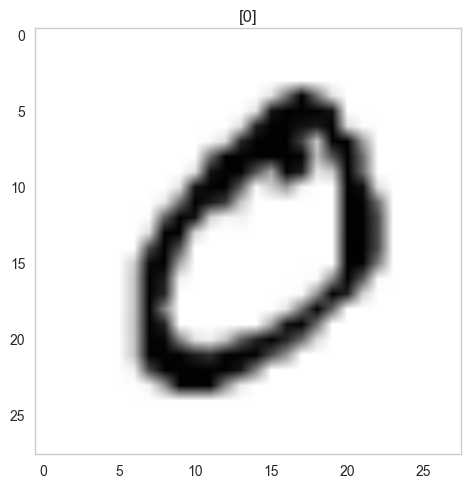

In [9]:
idx = 0
bilder = np.reshape(features.values[idx],(28,28))
plt.imshow(bilder)
plt.title(labels.values[idx])
plt.show()

## Dele i trening og testdata


In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data,train_target,  test_target = train_test_split(features.values[:10000], labels[:10000].values, test_size=0.33, random_state=42)

## Endelig kan vi opprette og trene klassifikatoren

In [6]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(train_data,train_target.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

## Hva ble nøyaktigheten?

In [7]:
predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target.ravel()).mean()

Accuracy score: 0.940303


Nøyaktigheten ble veldig bra. Men det er likevel noen bilder som ble klassifisert feil. For å få en bedre innsikt i klassifikatoren, kan vi vise frem de bildene som ble feilklassifiserte

(197L, 784L)


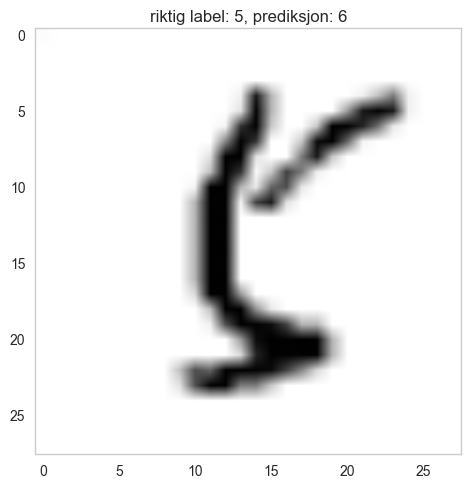

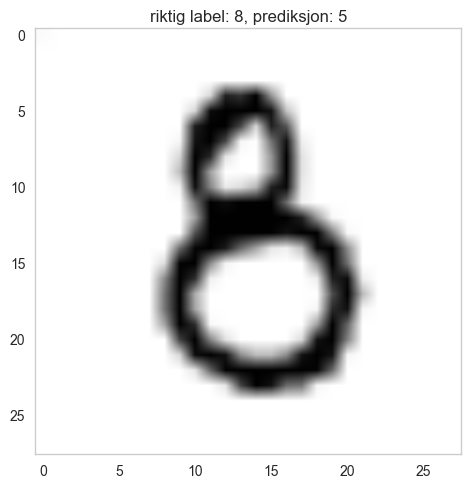

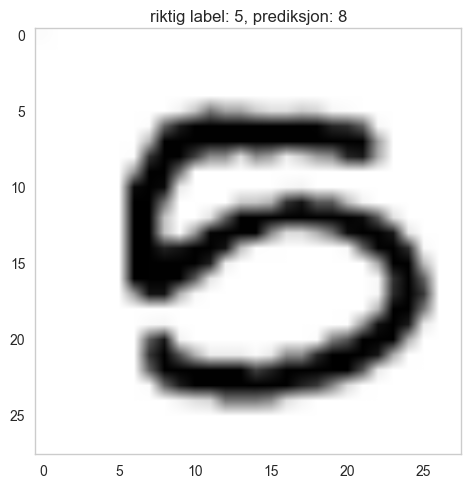

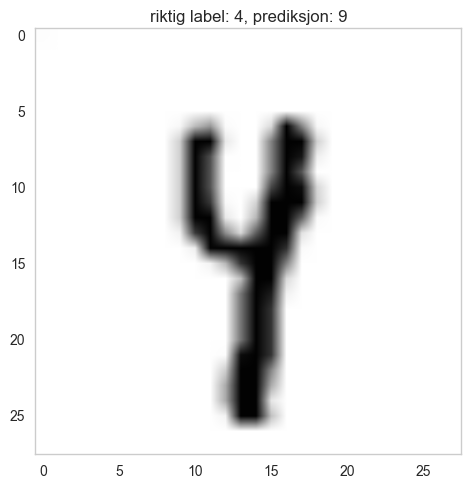

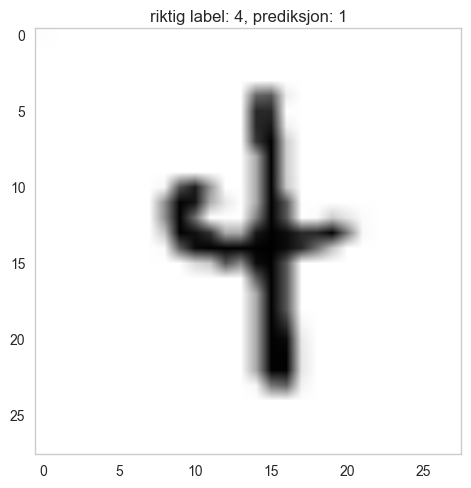

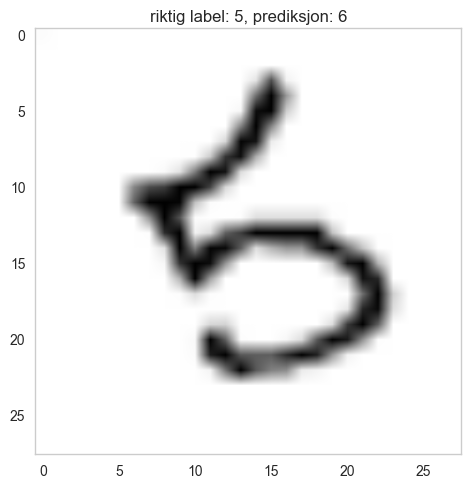

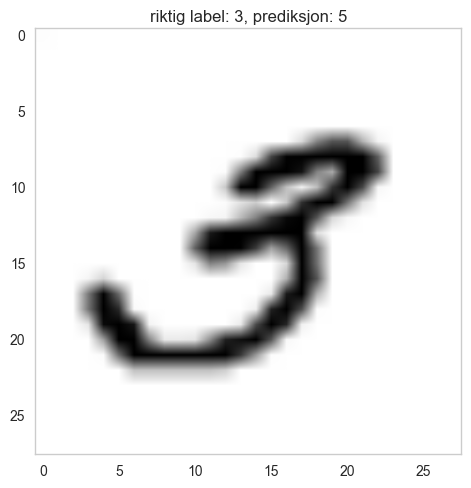

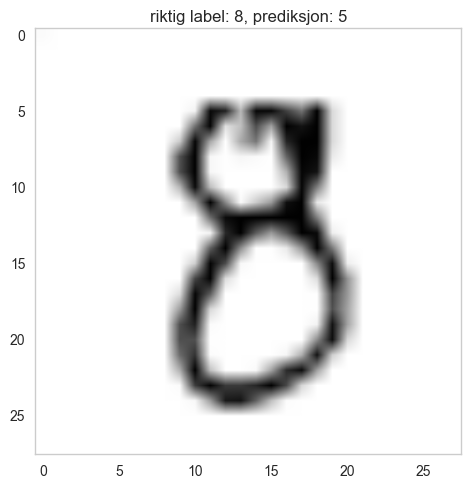

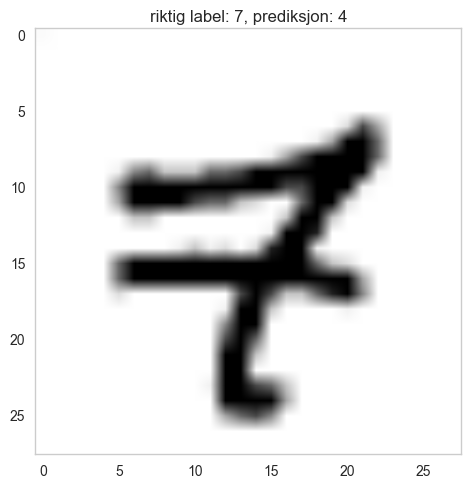

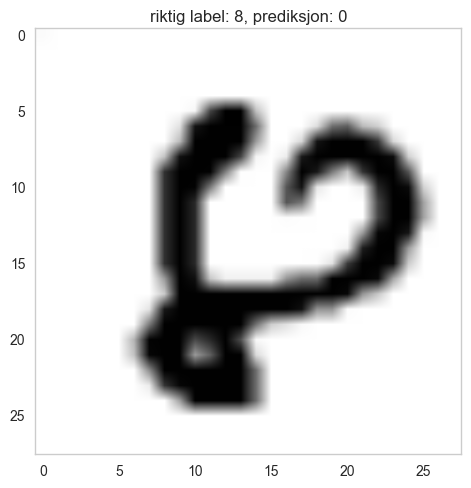

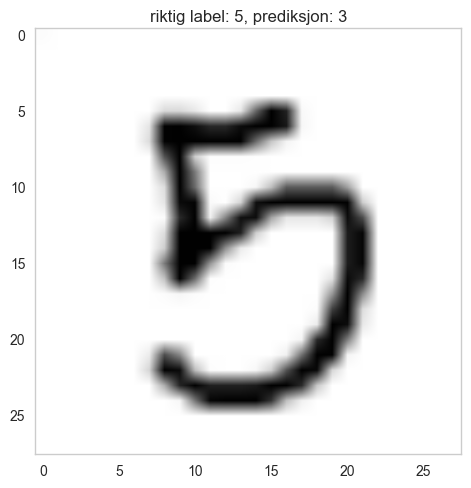

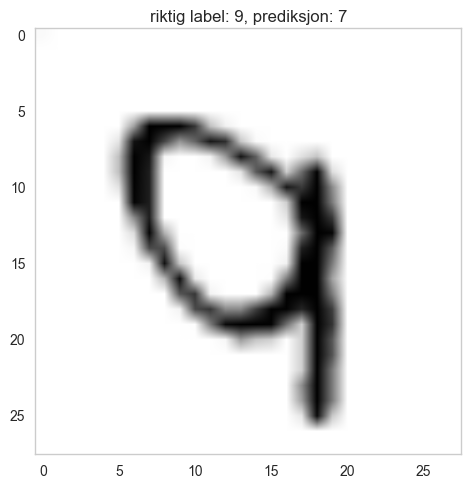

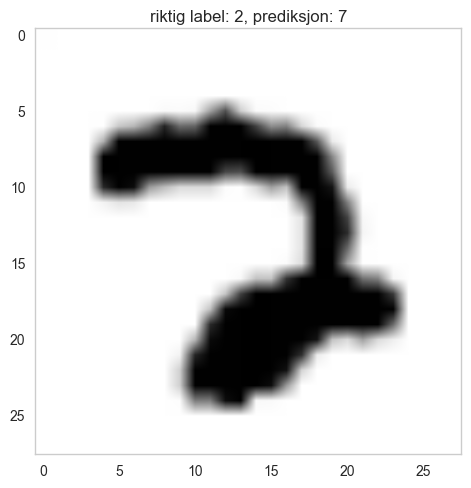

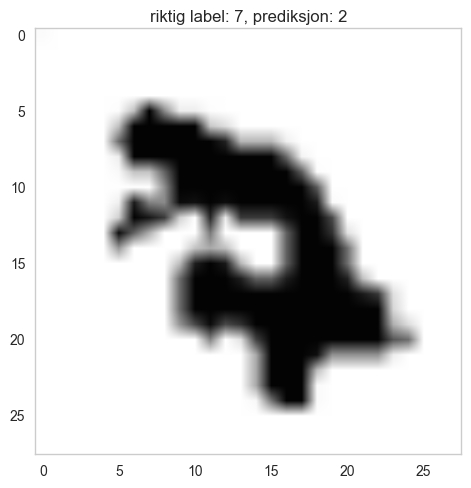

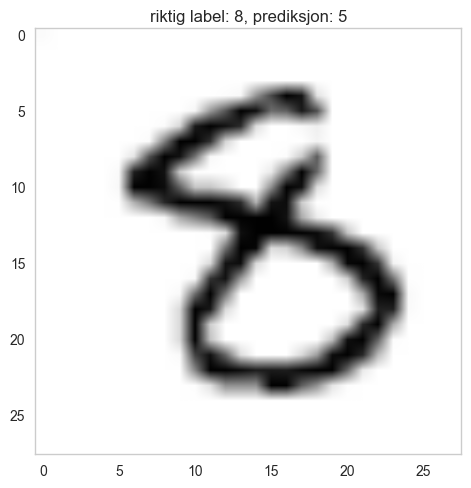

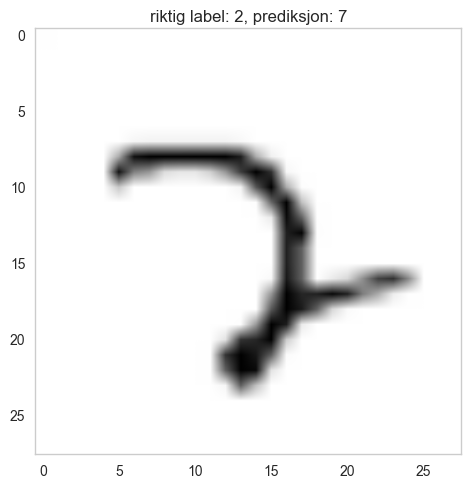

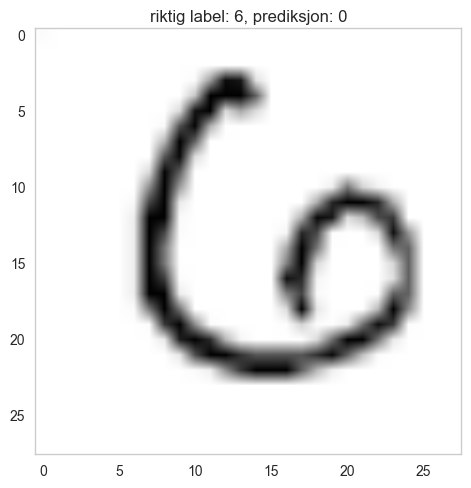

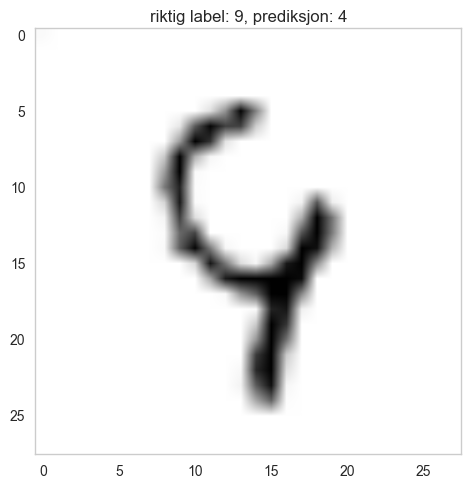

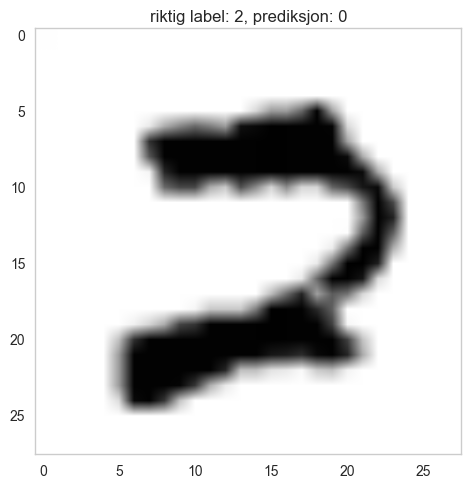

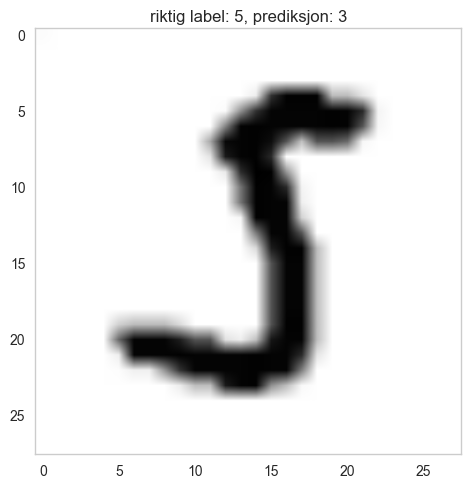

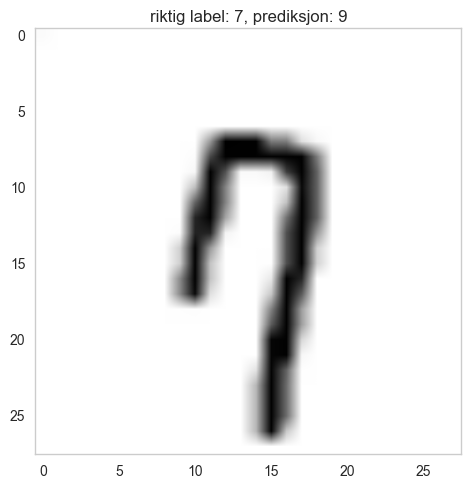

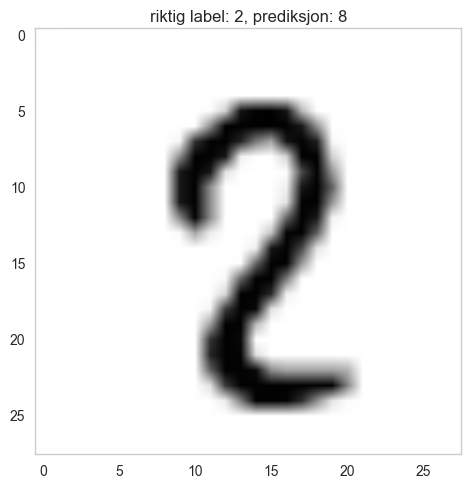

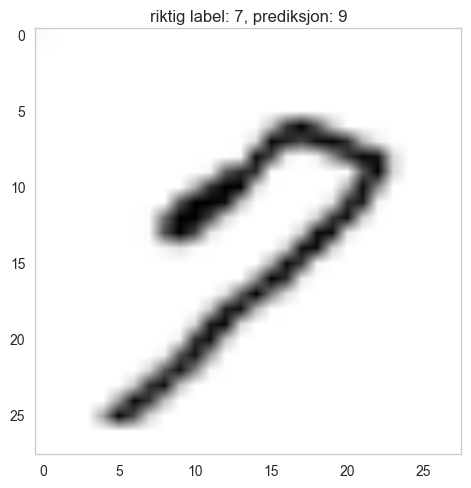

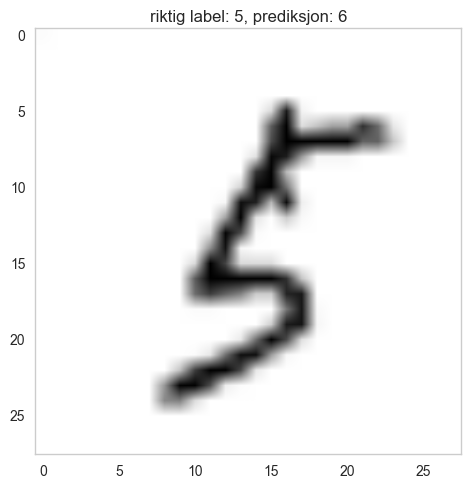

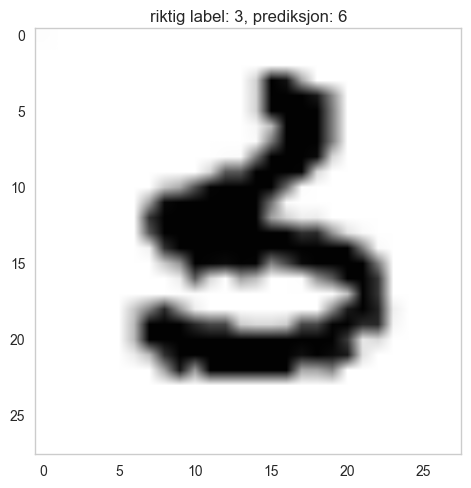

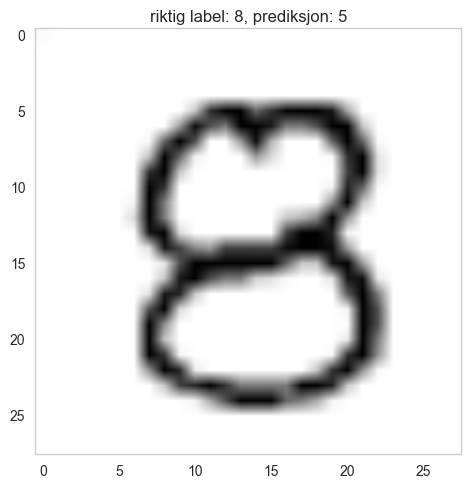

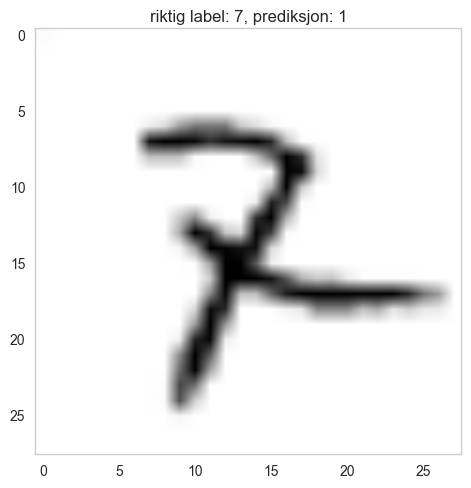

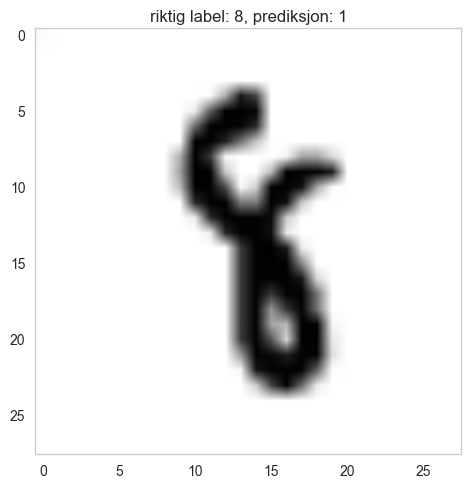

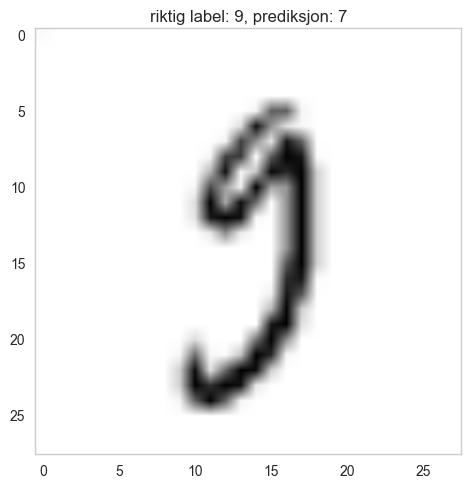

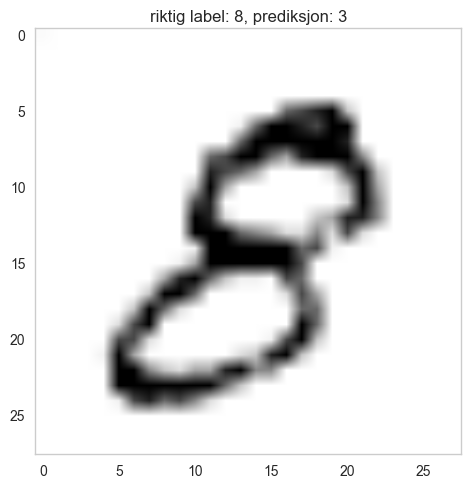

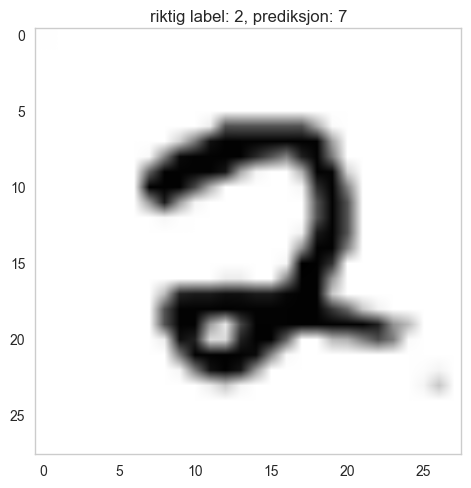

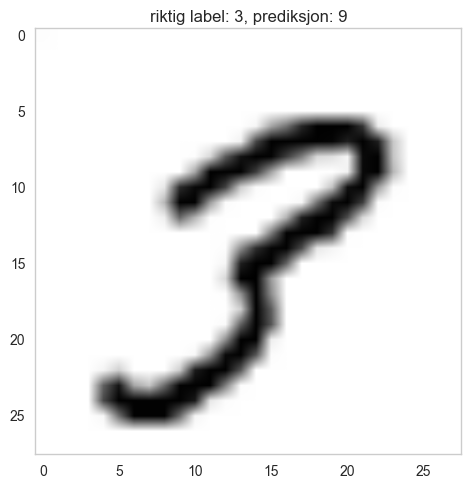

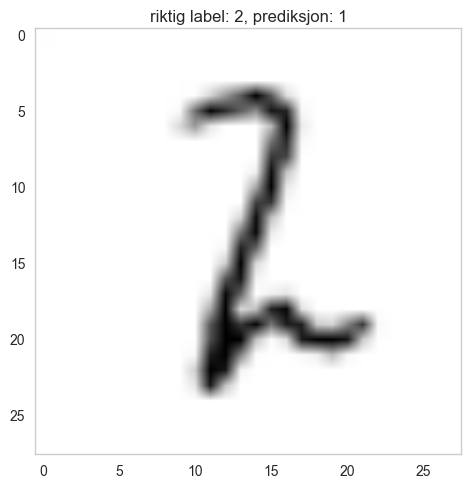

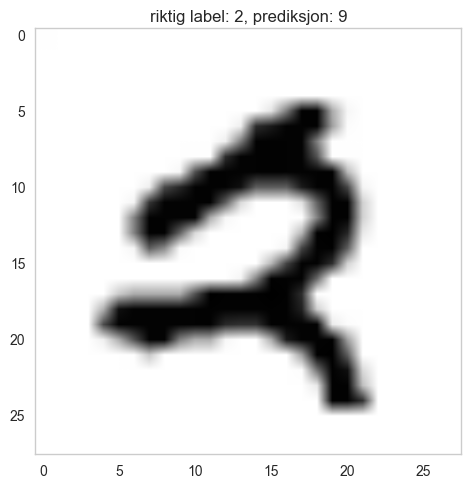

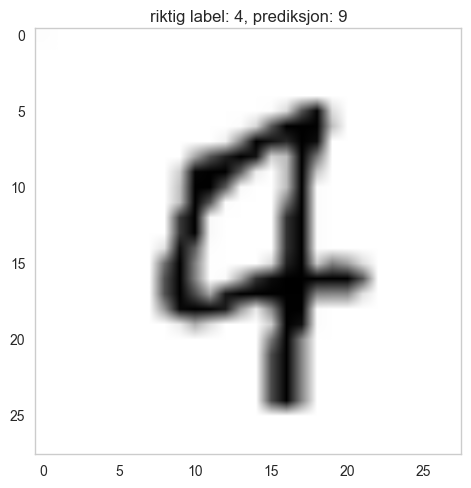

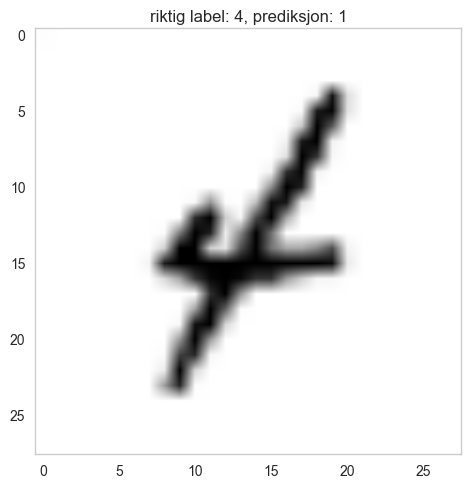

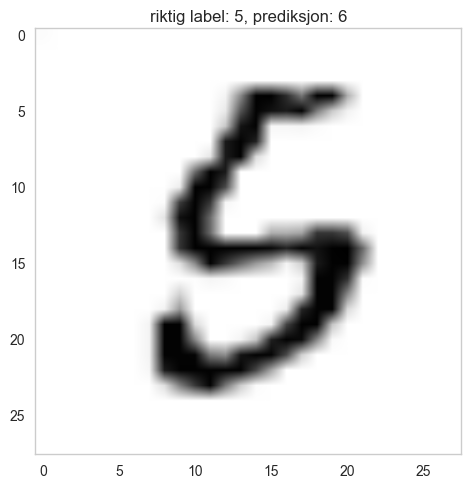

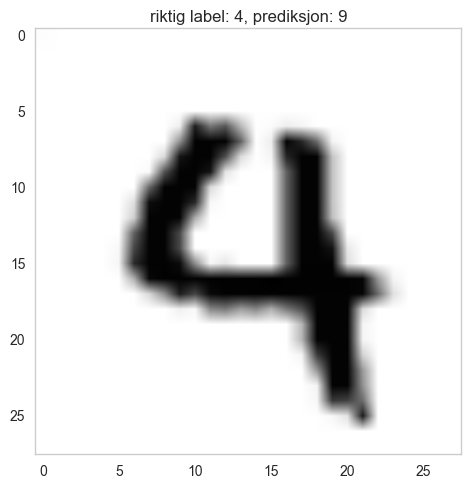

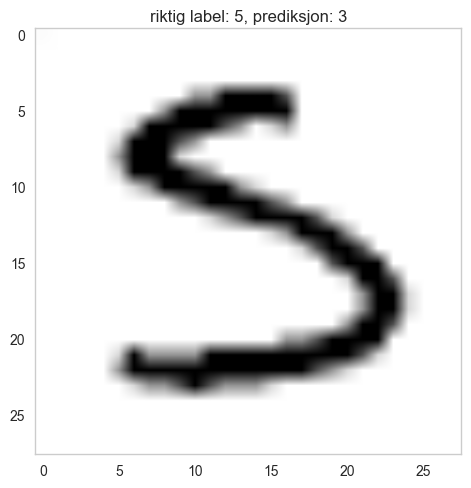

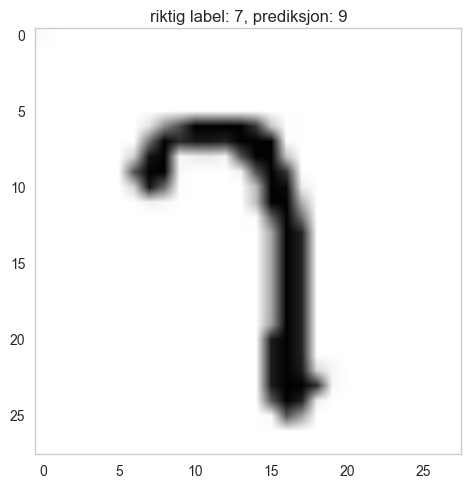

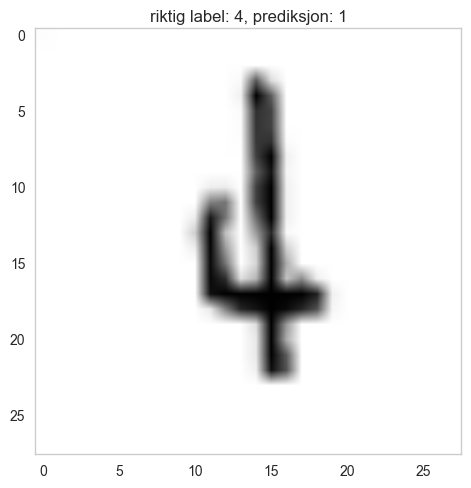

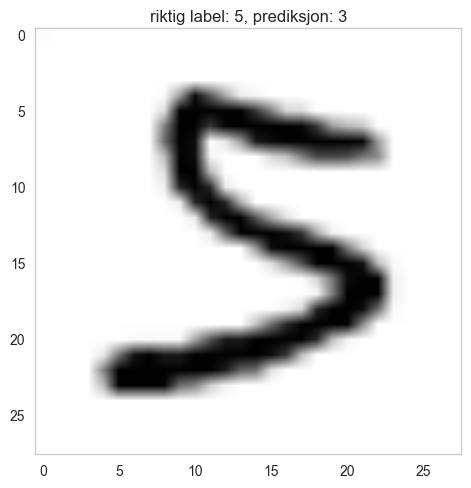

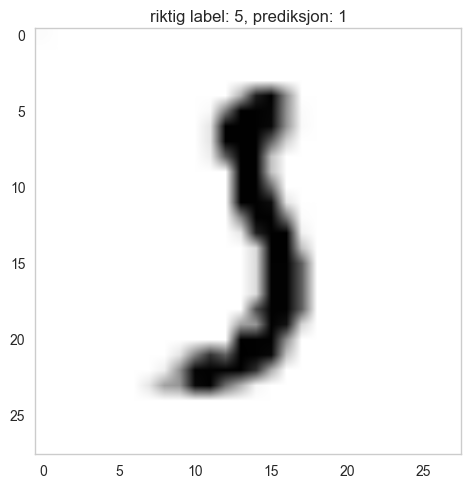

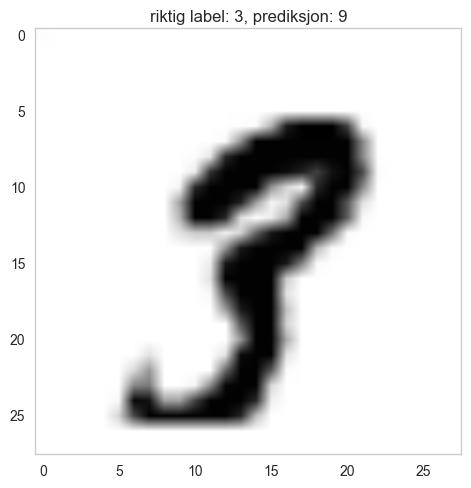

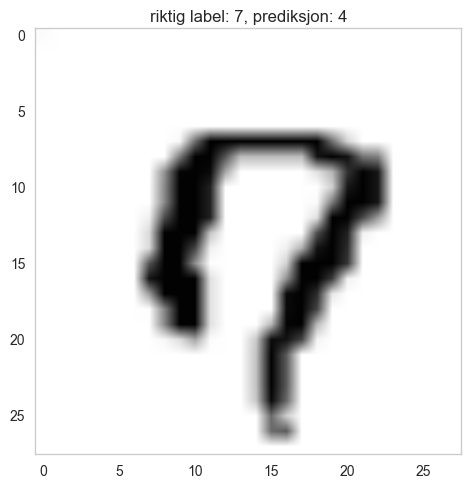

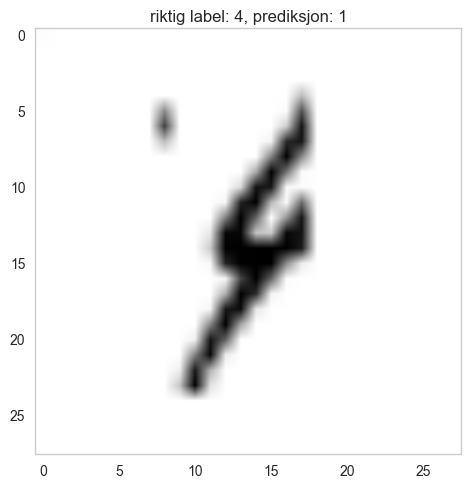

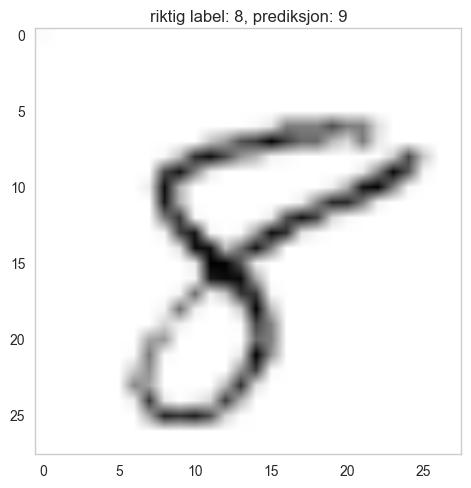

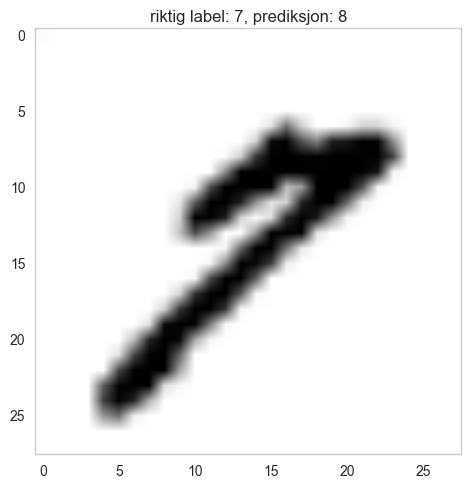

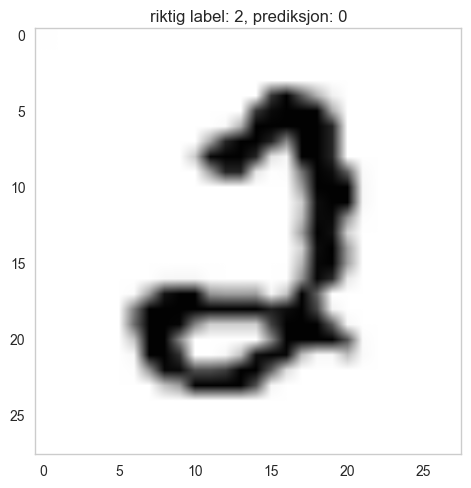

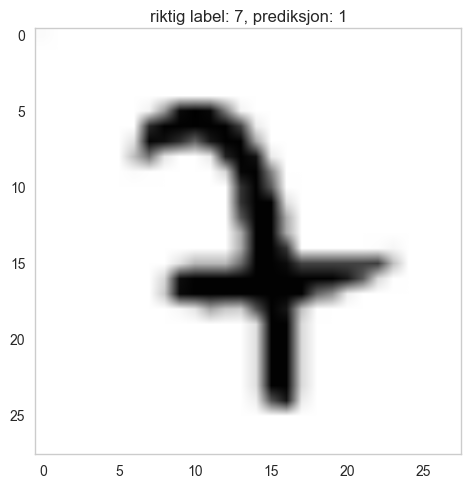

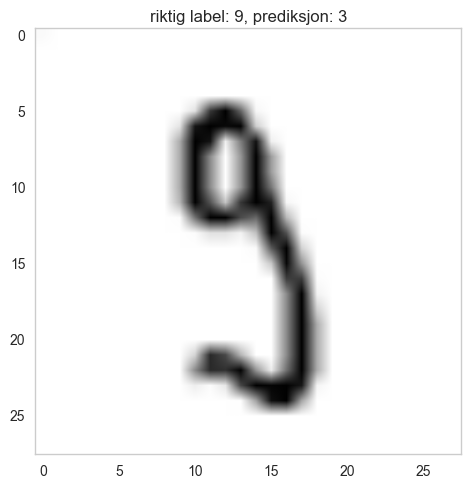

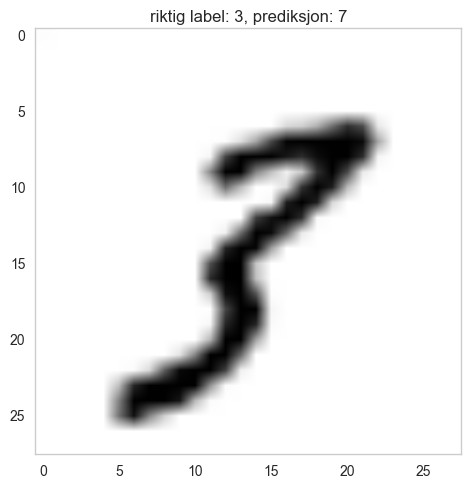

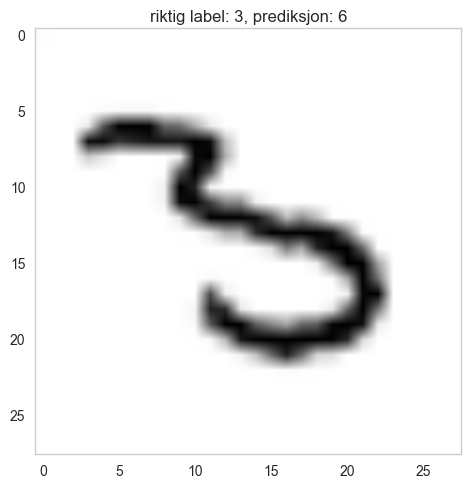

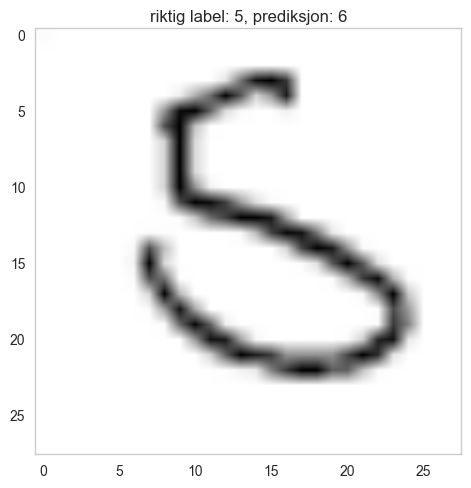

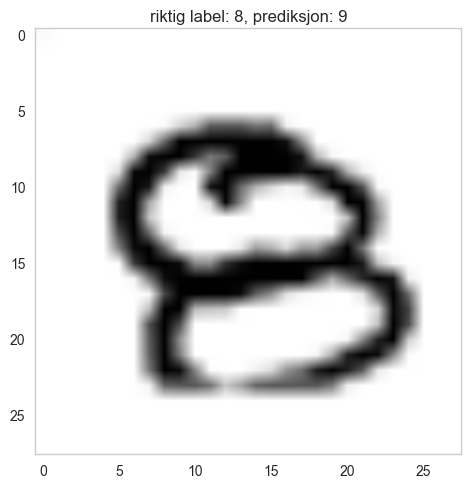

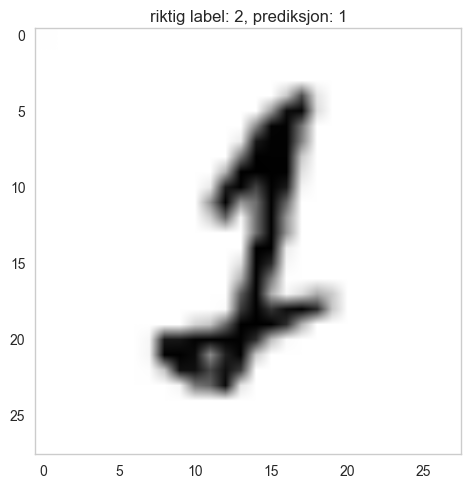

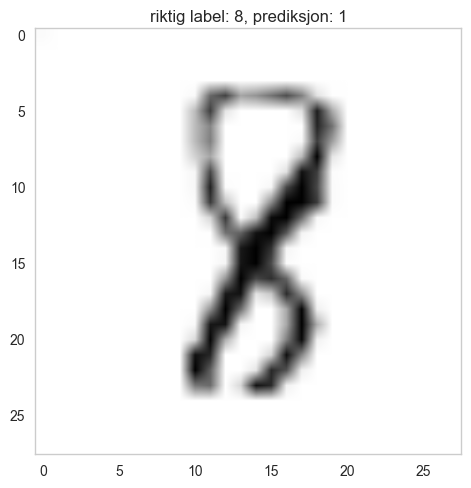

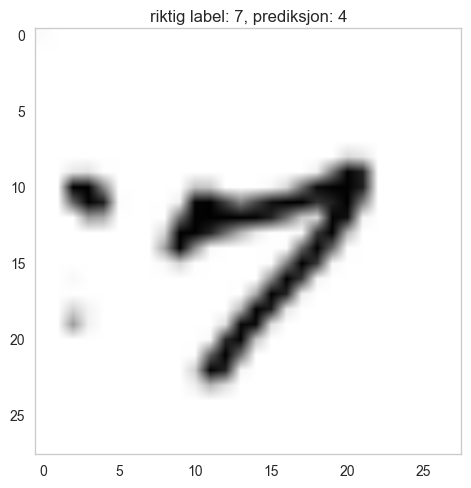

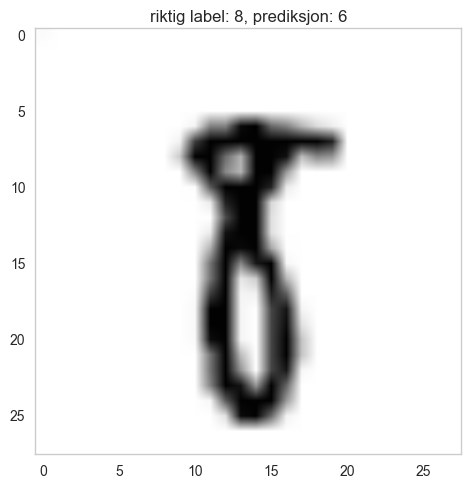

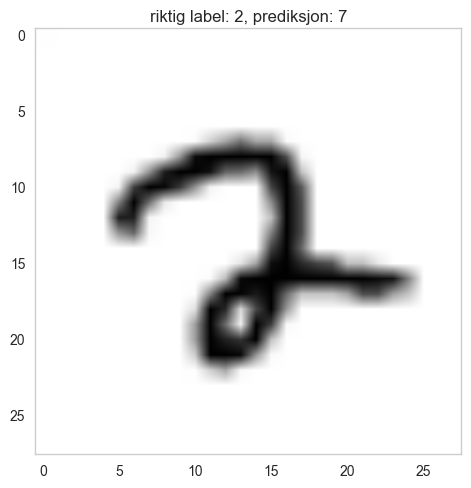

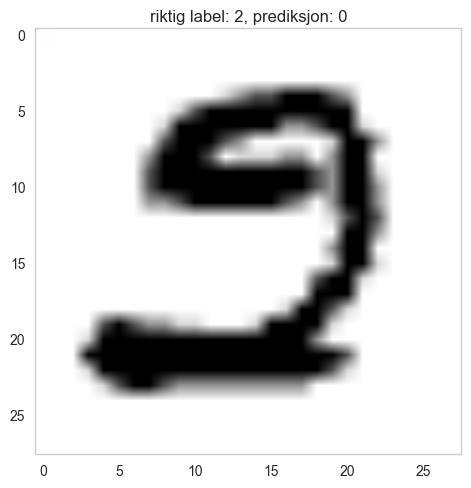

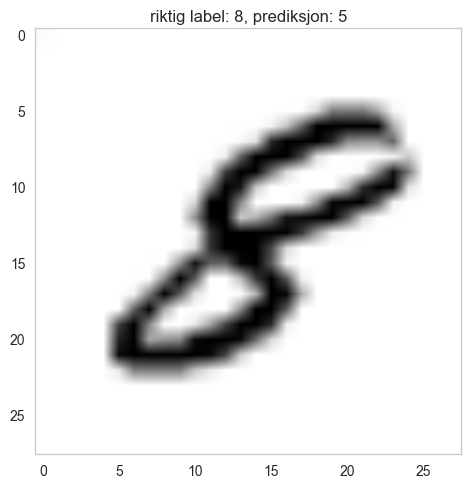

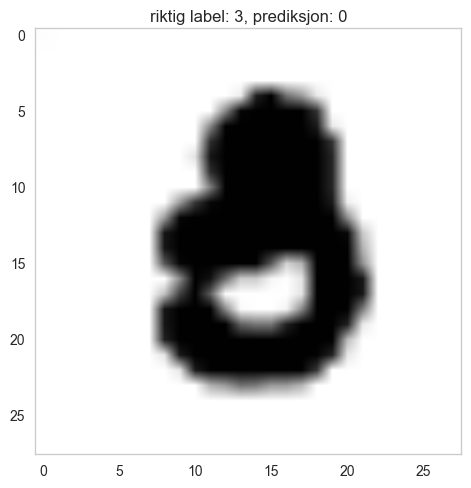

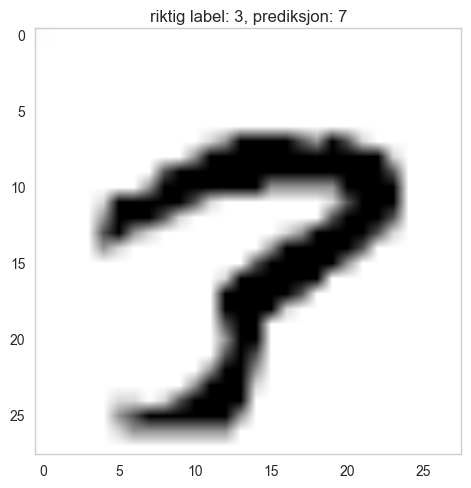

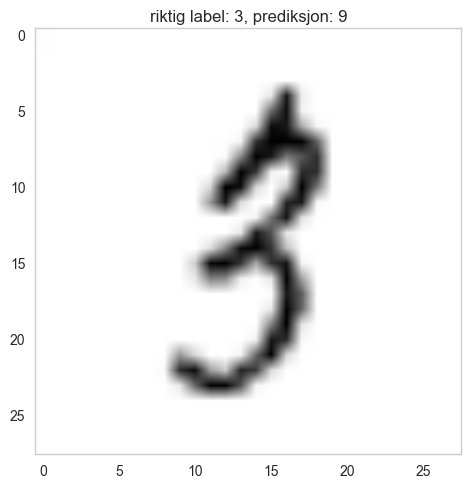

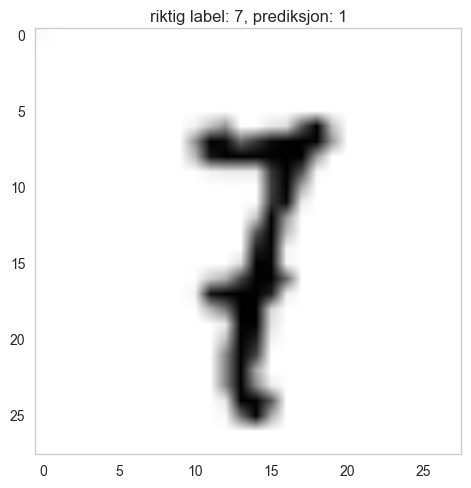

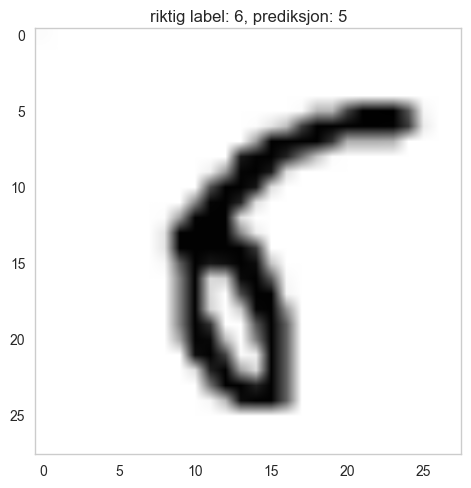

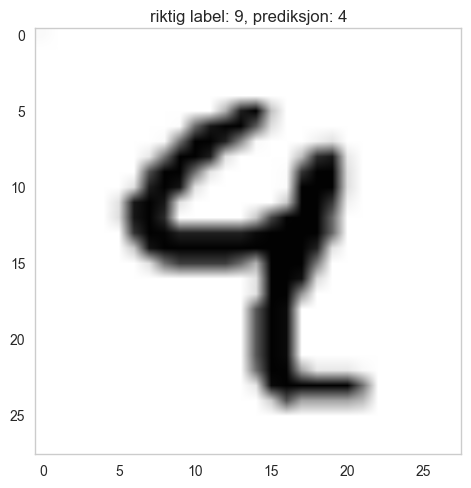

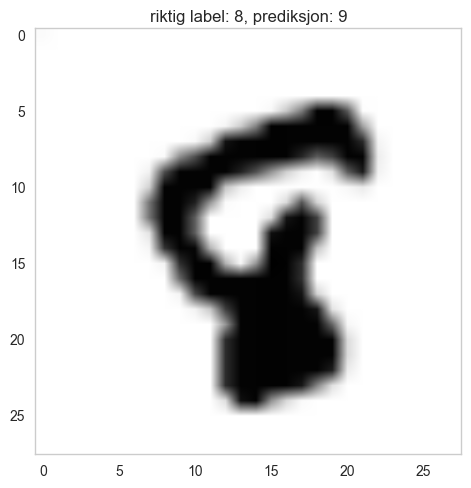

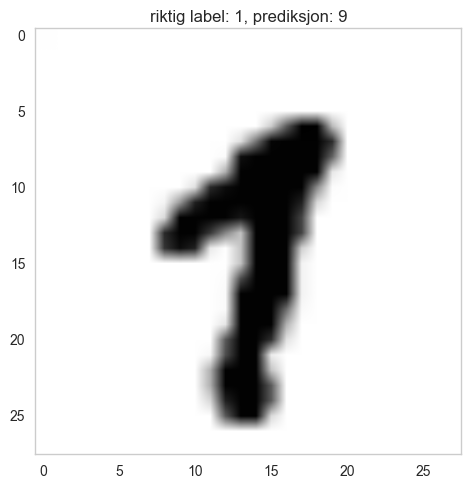

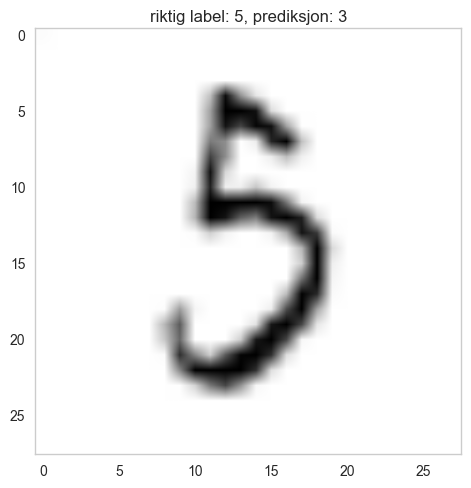

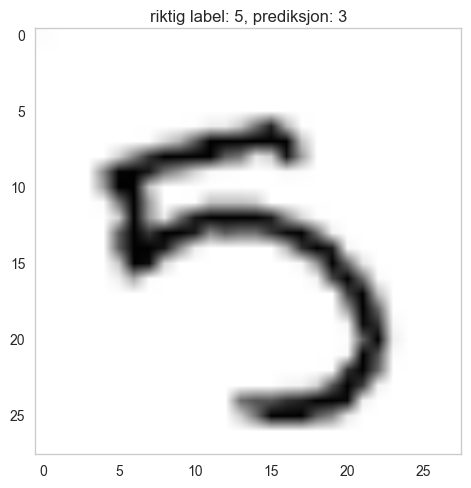

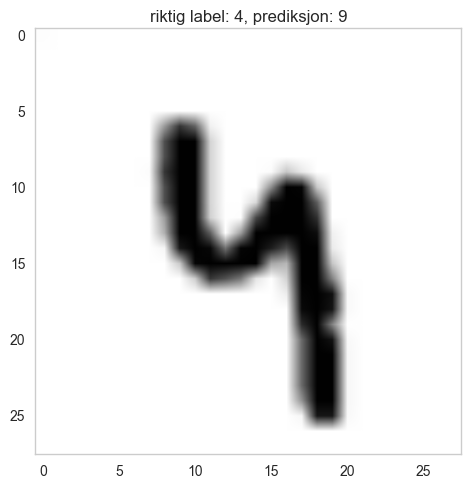

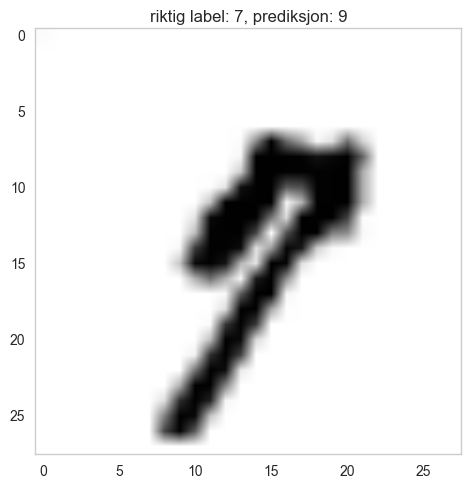

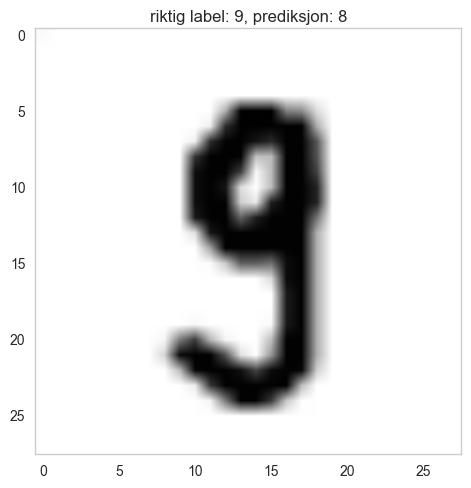

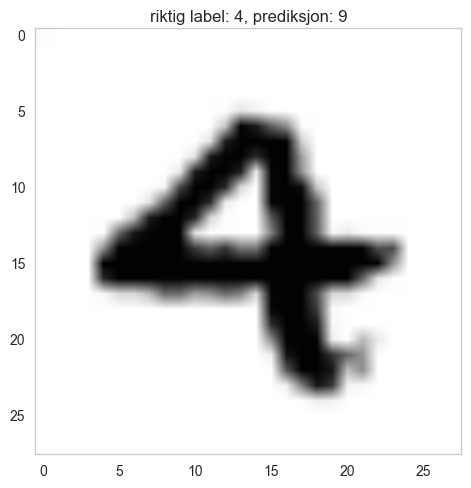

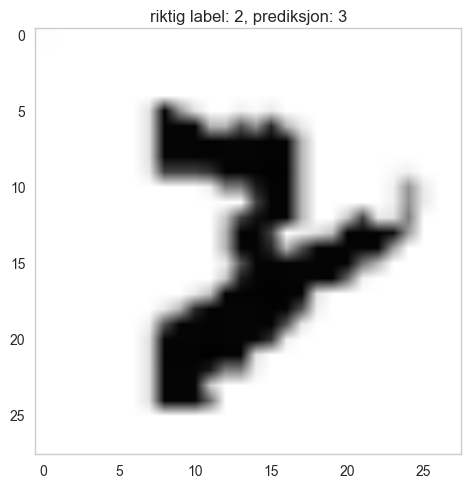

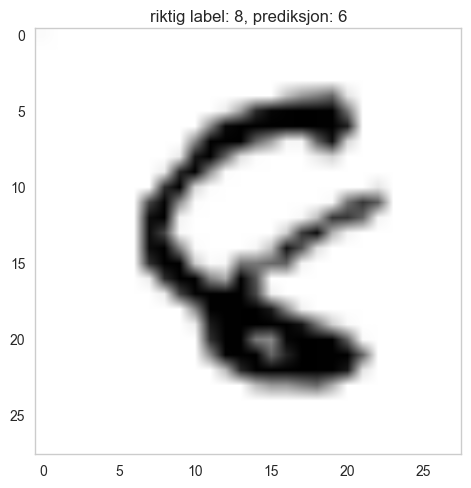

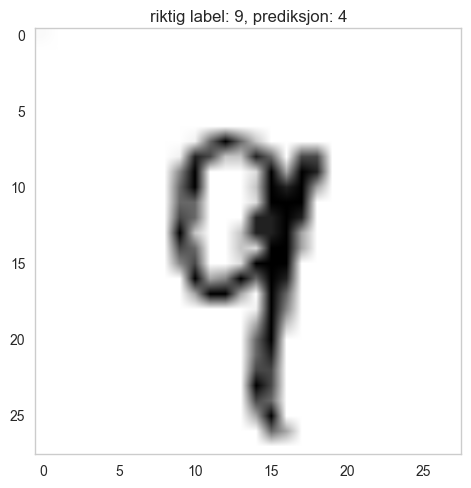

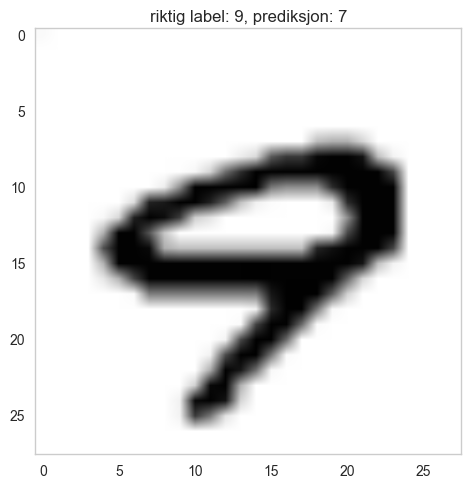

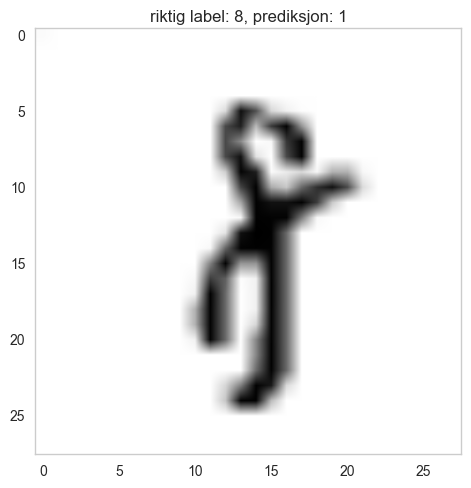

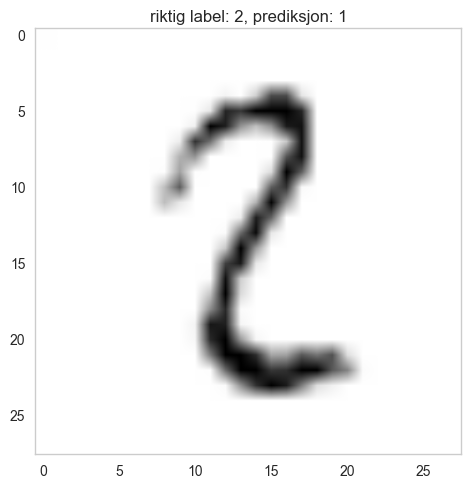

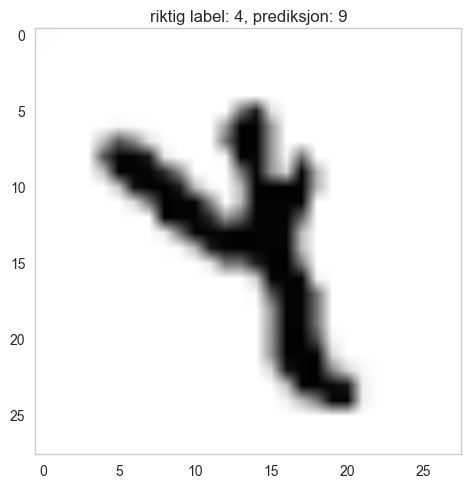

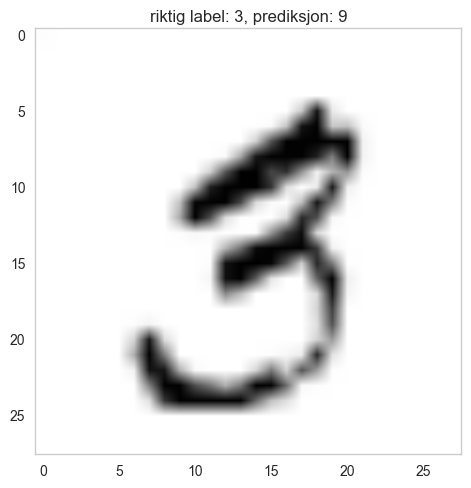

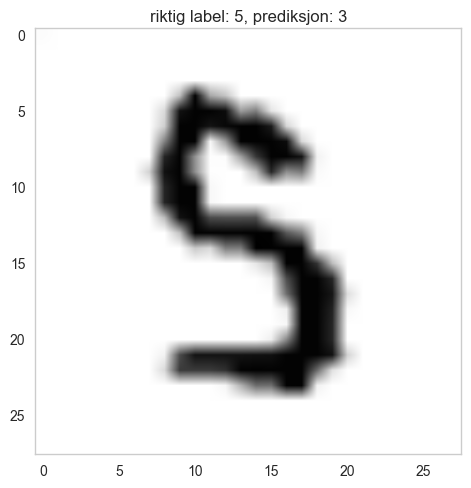

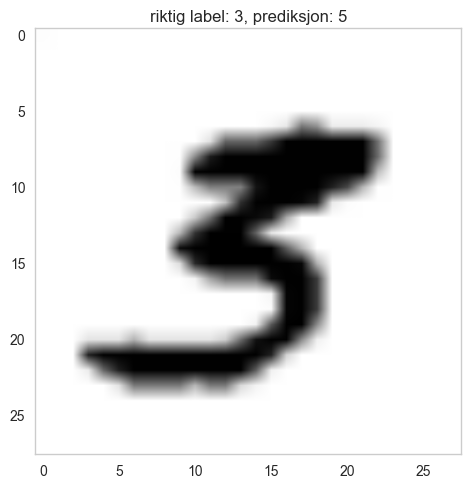

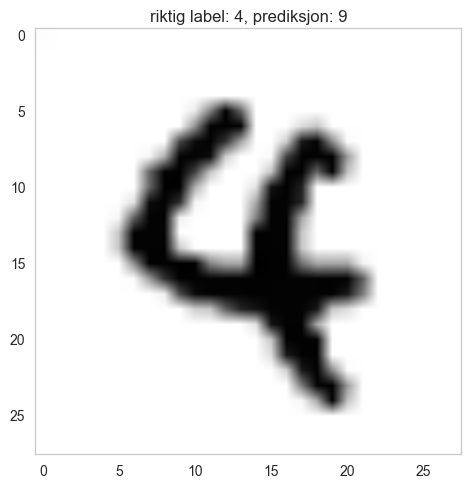

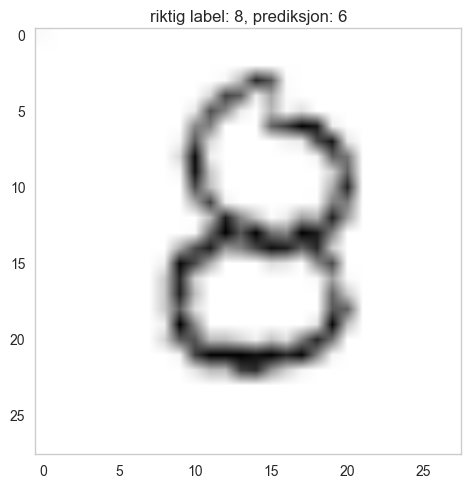

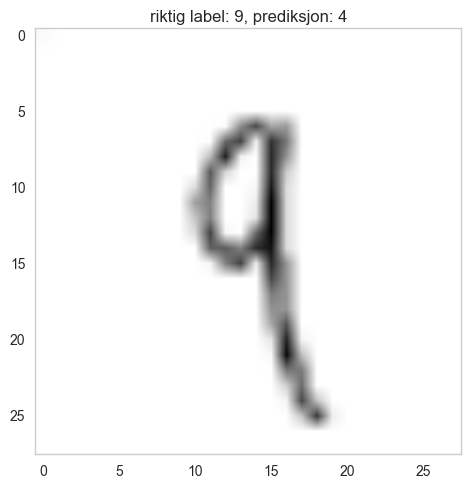

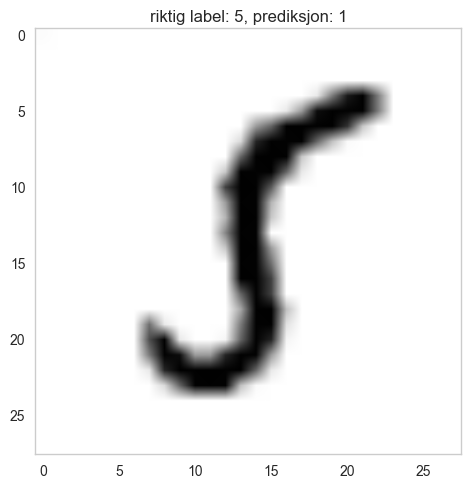

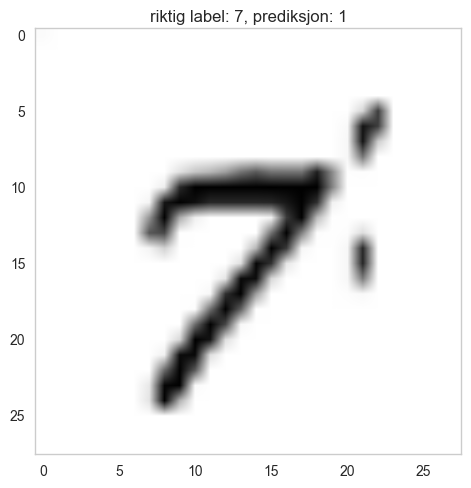

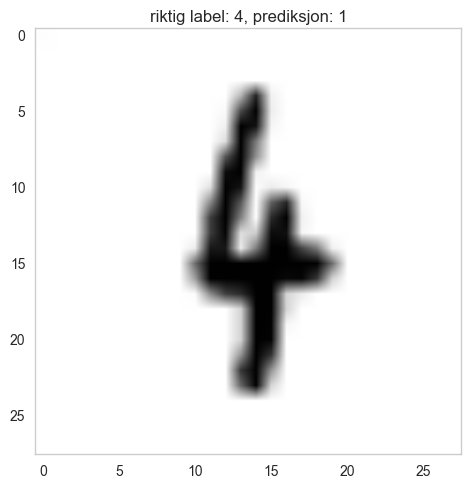

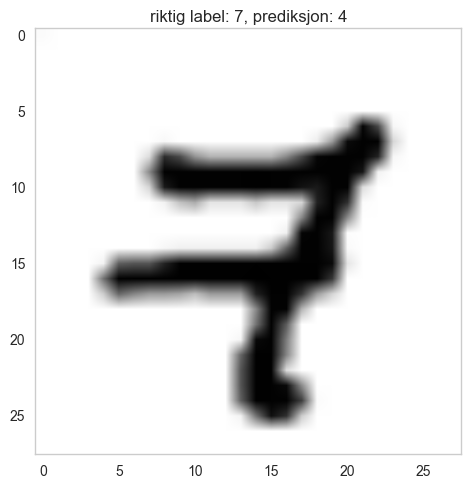

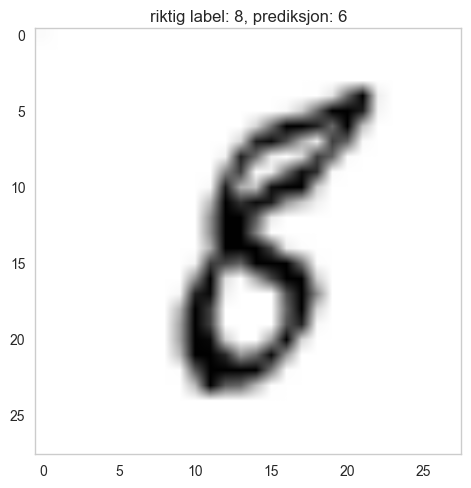

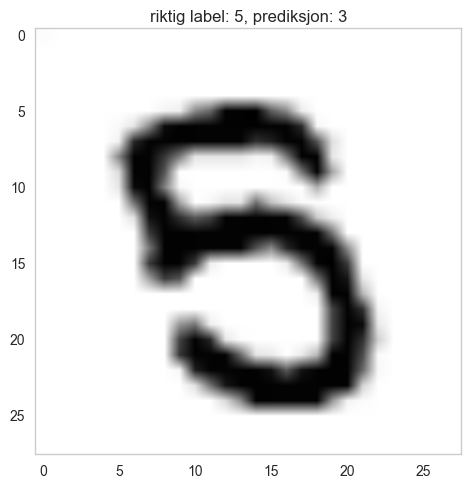

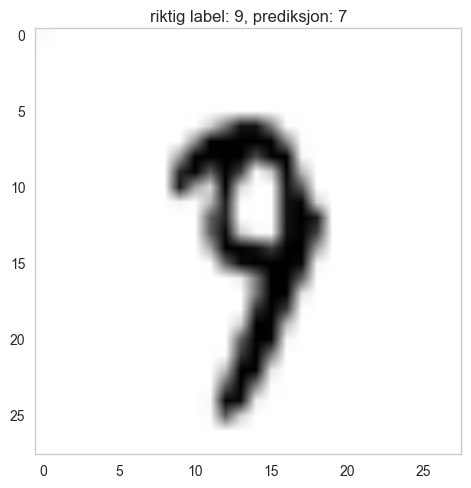

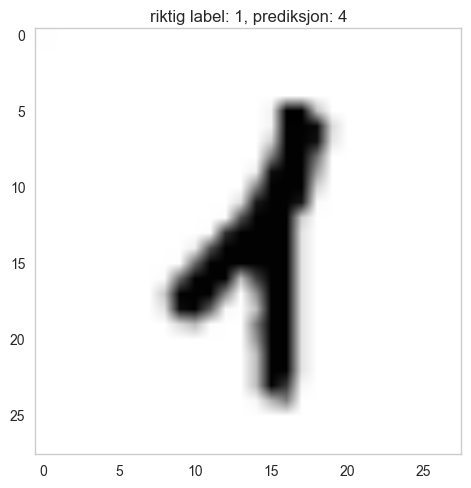

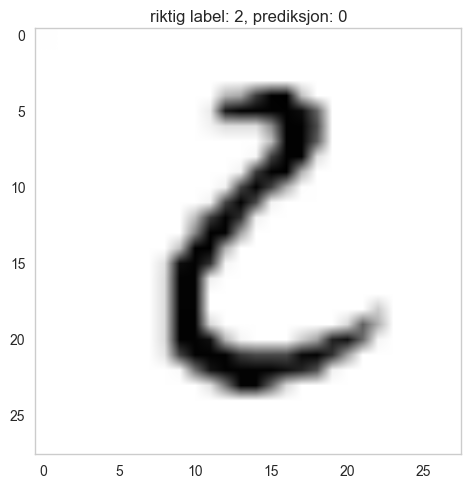

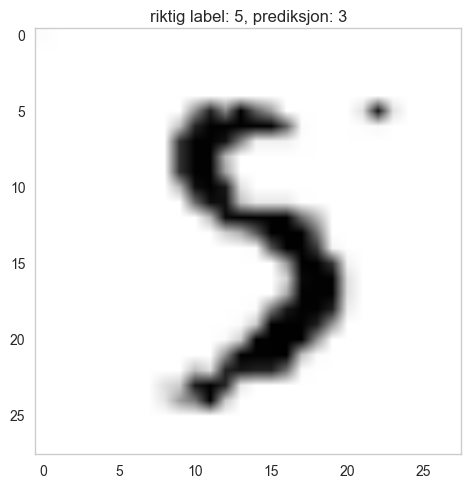

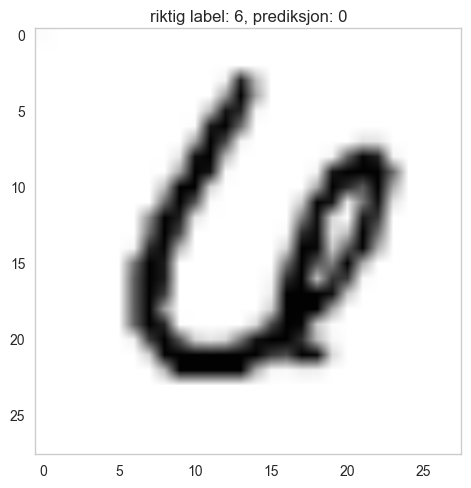

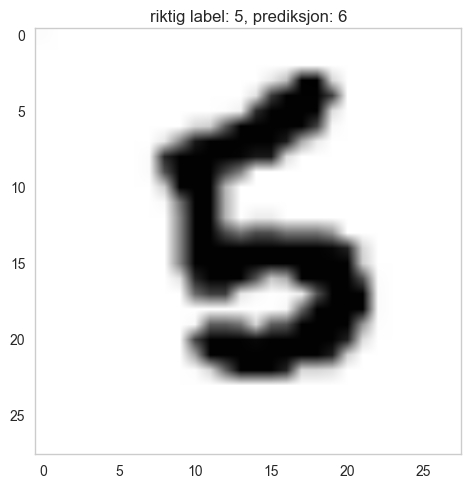

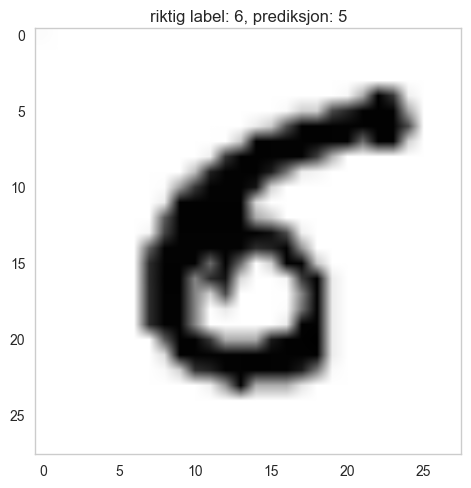

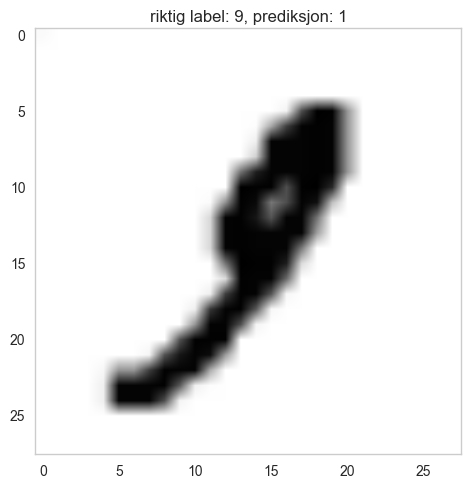

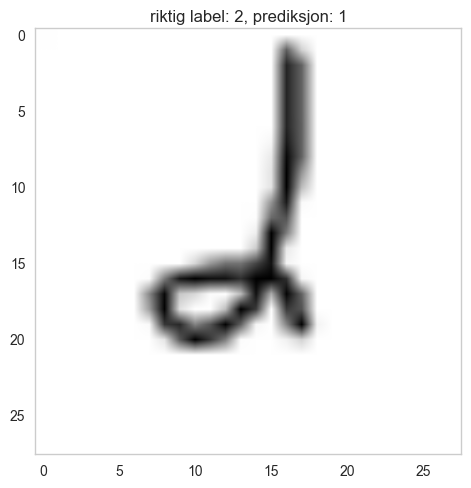

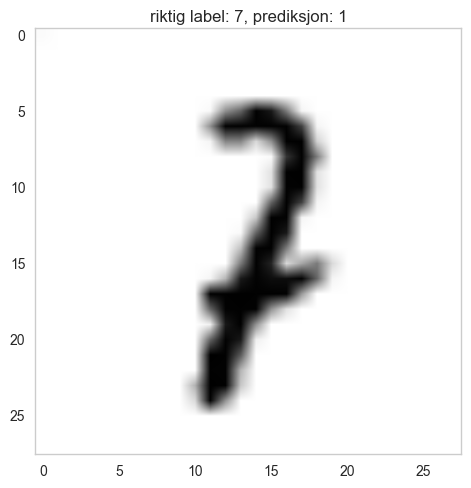

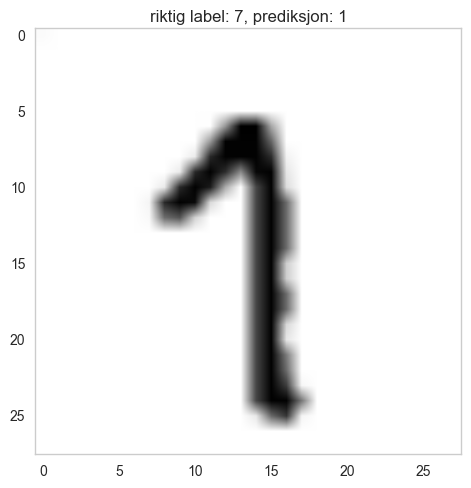

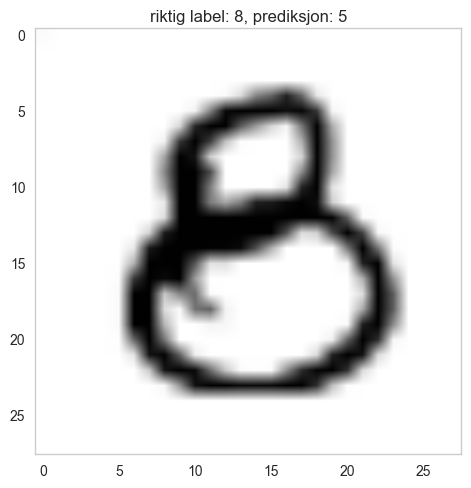

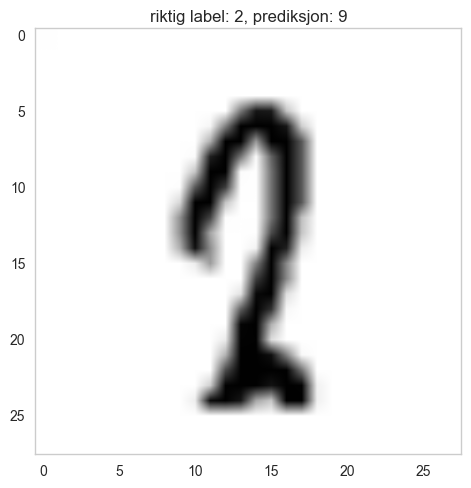

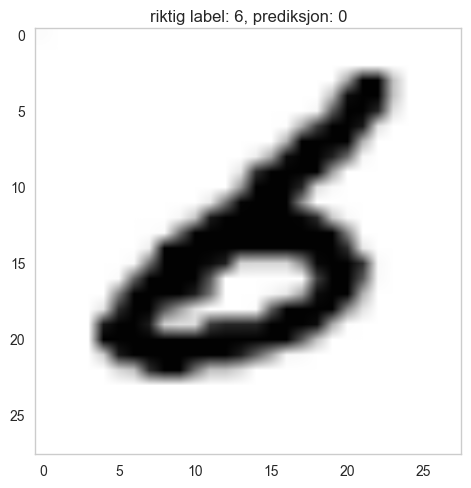

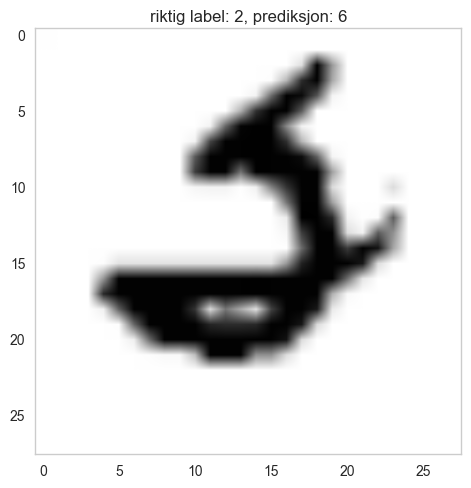

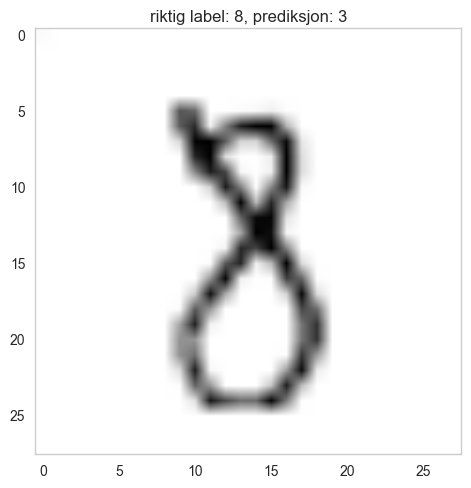

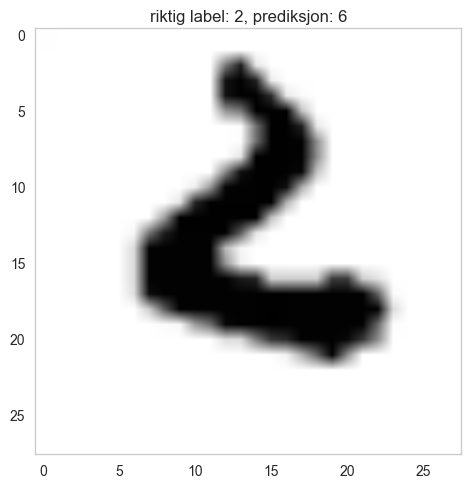

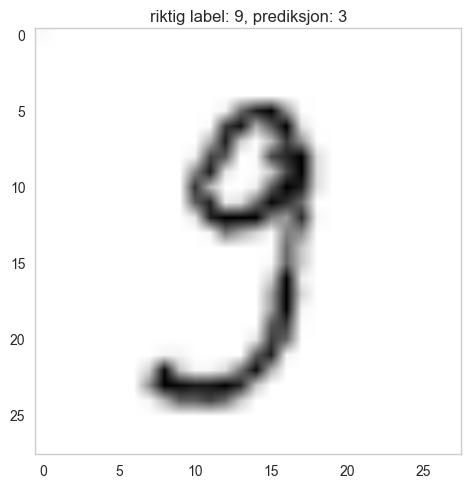

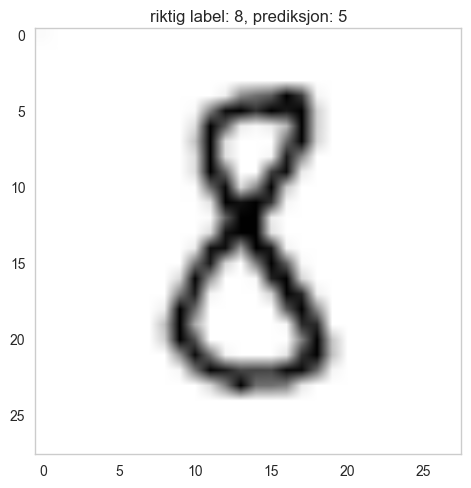

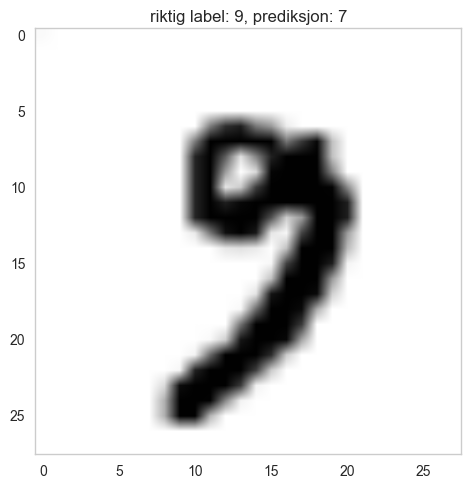

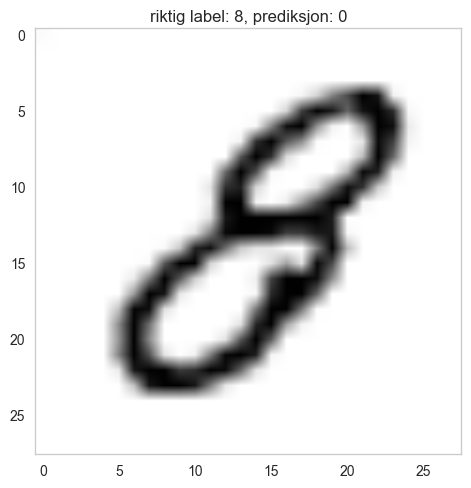

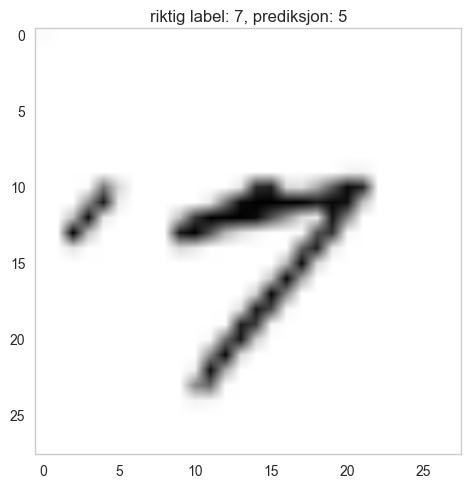

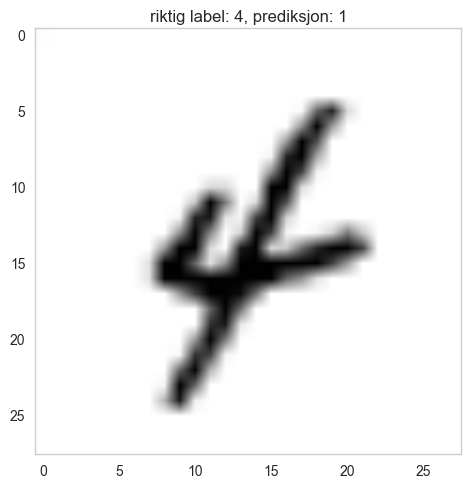

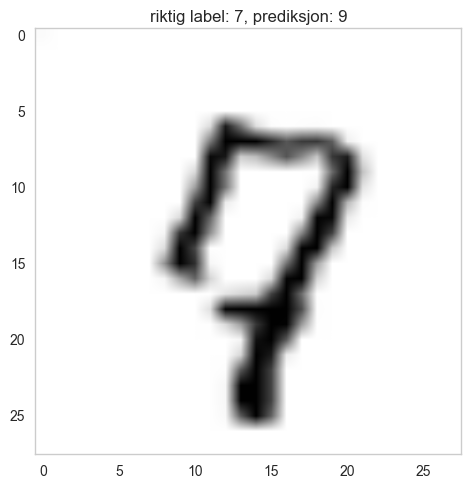

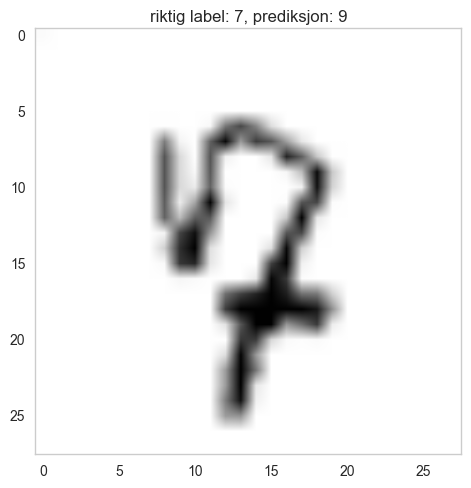

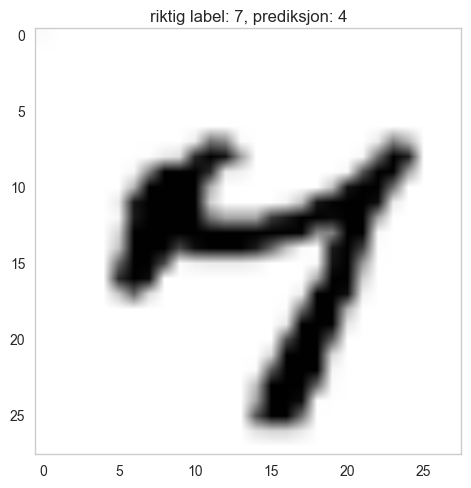

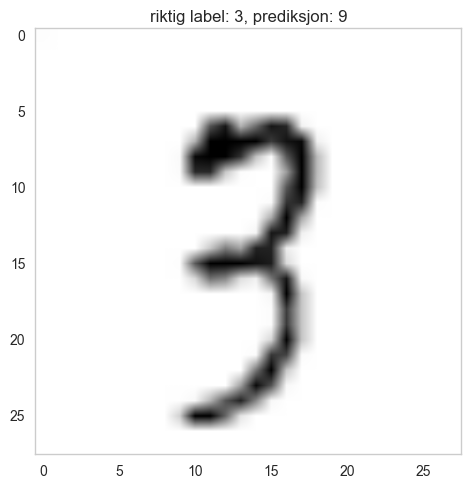

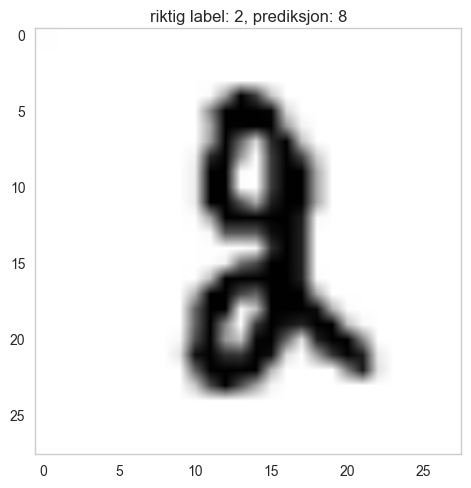

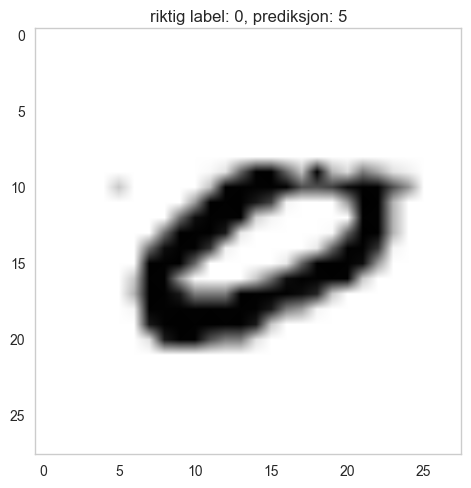

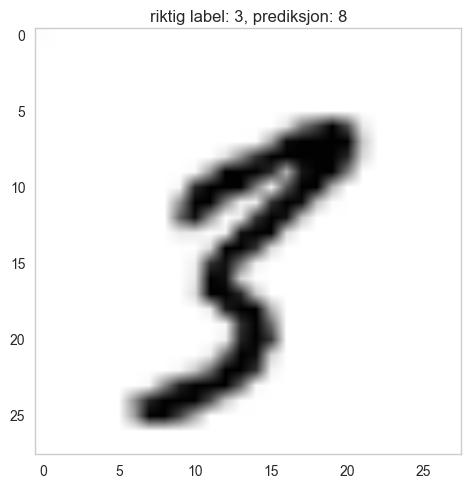

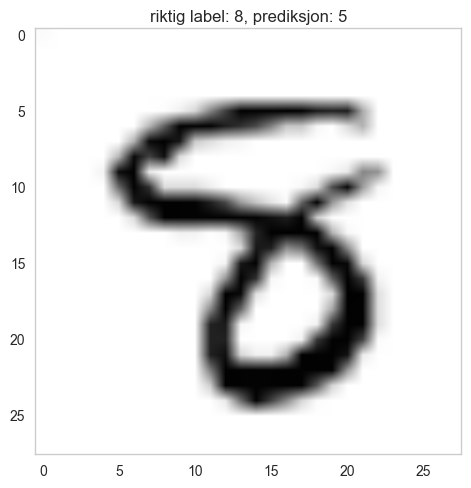

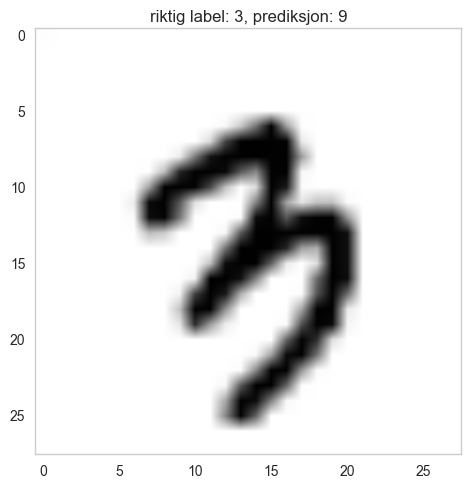

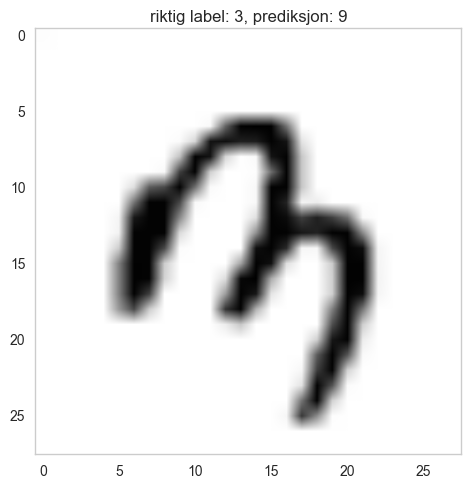

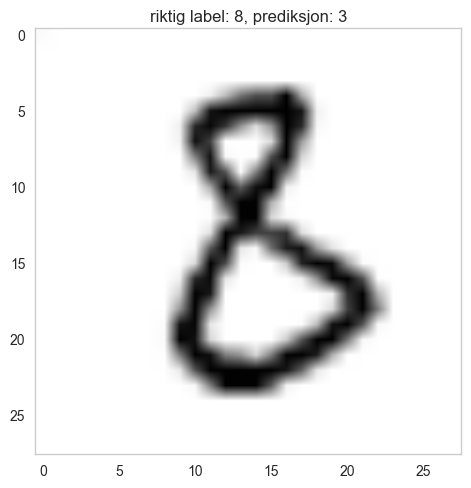

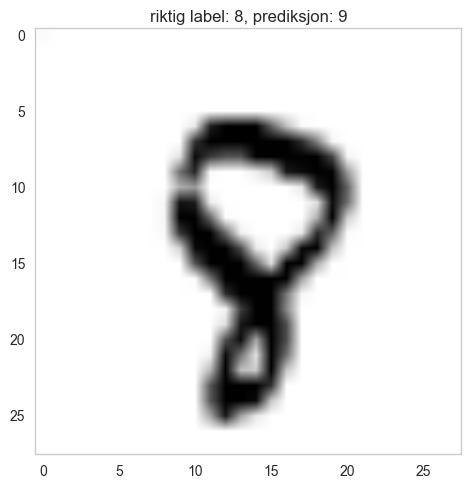

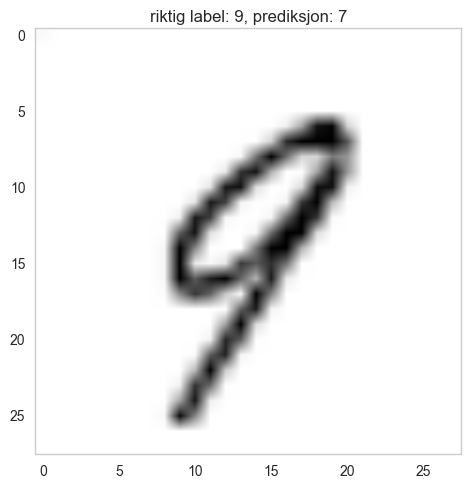

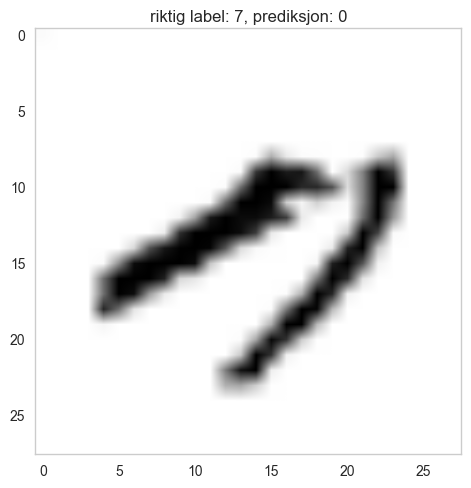

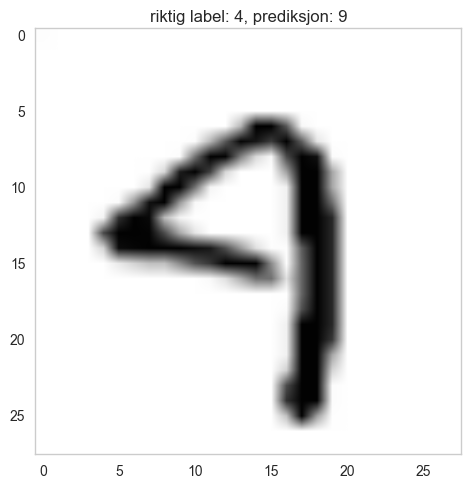

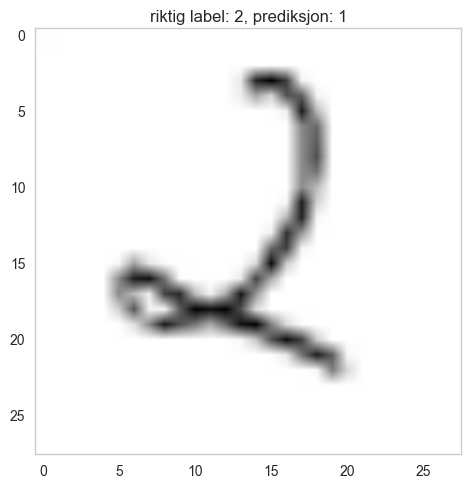

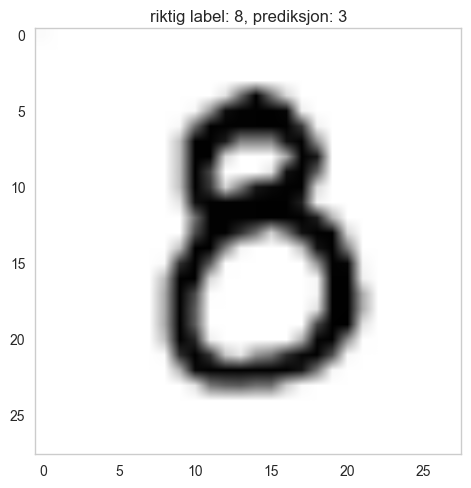

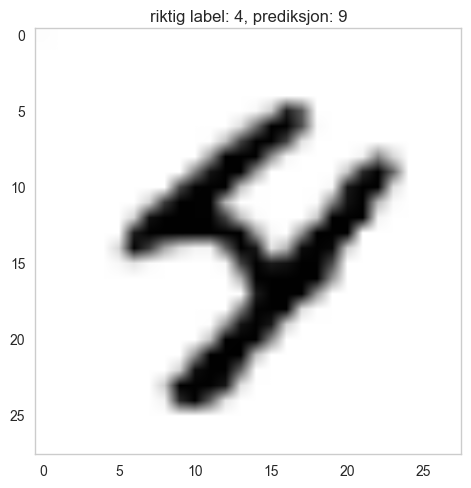

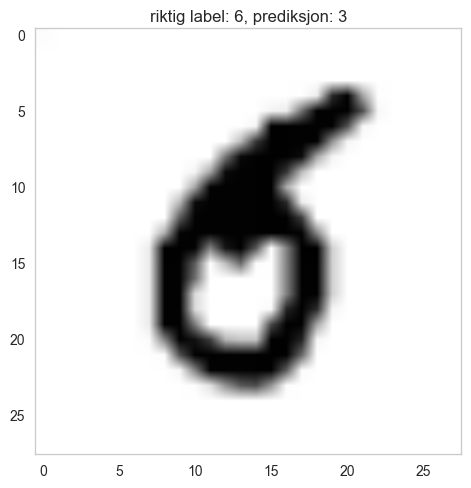

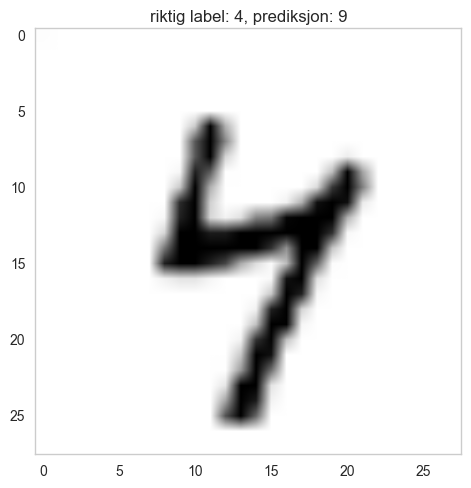

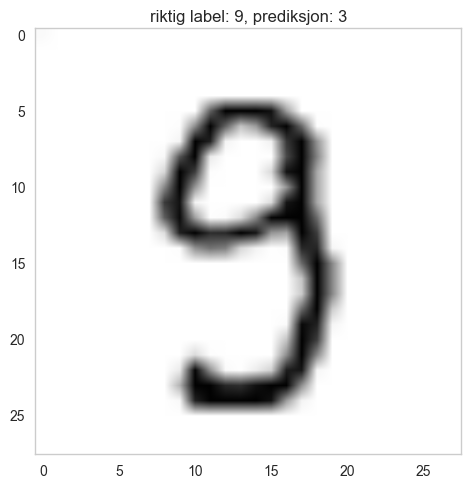

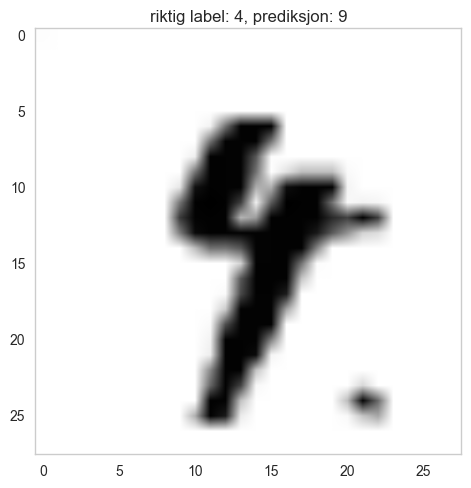

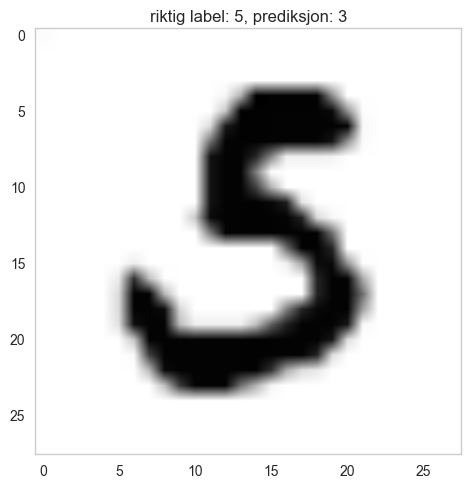

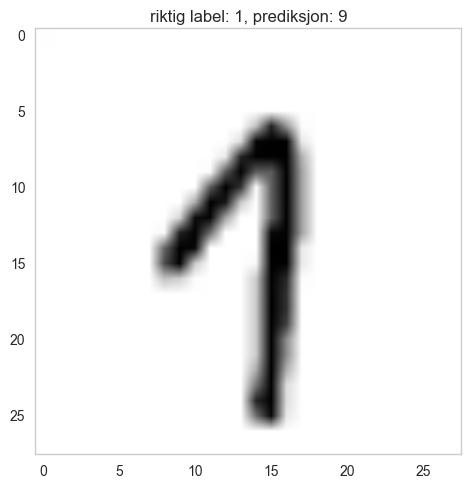

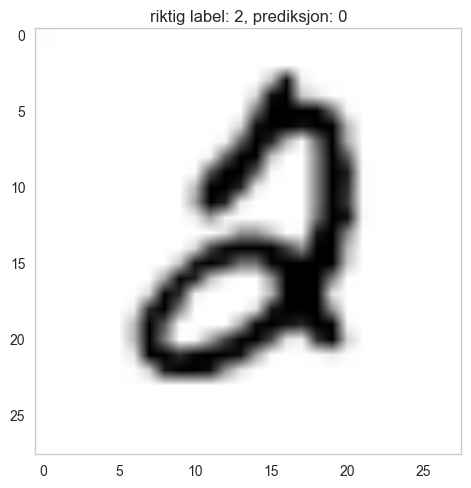

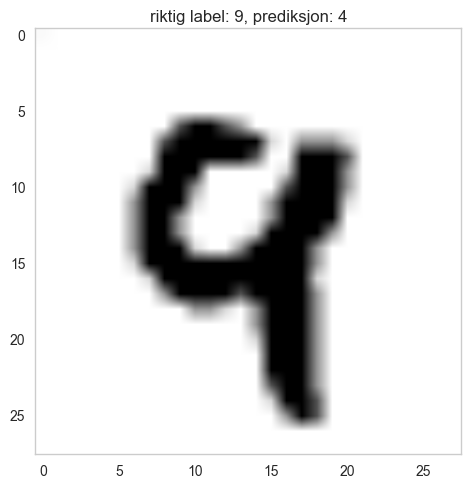

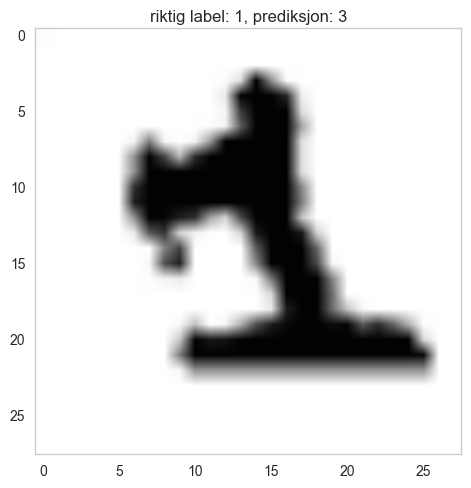

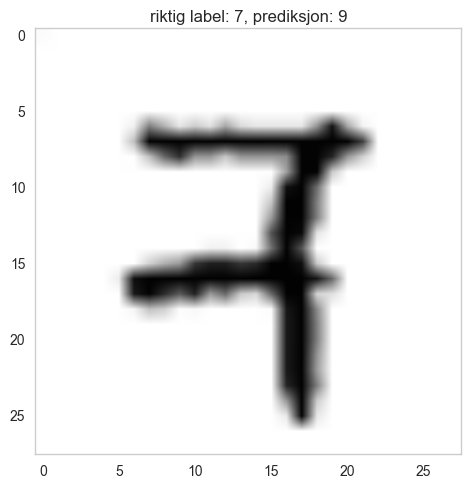

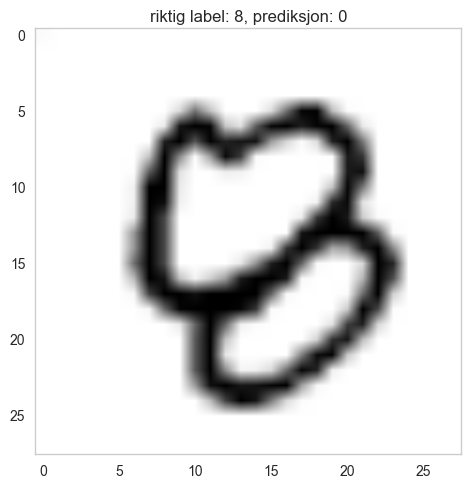

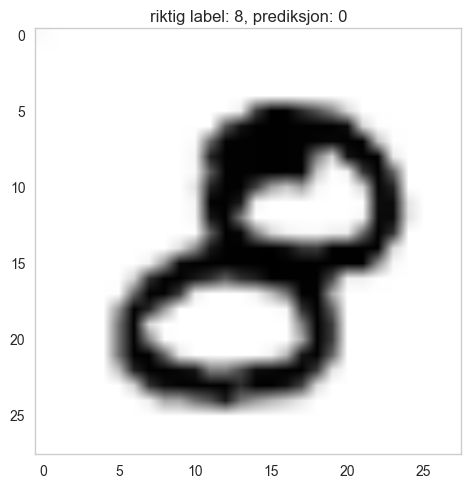

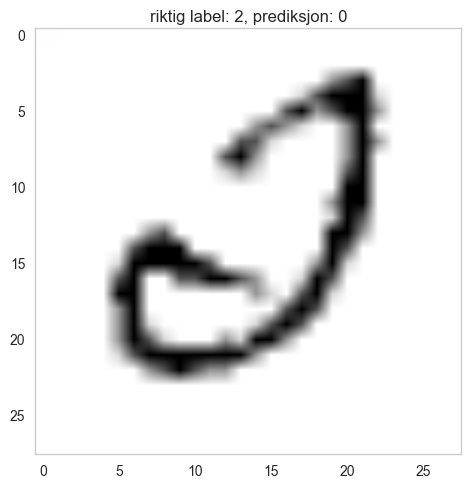

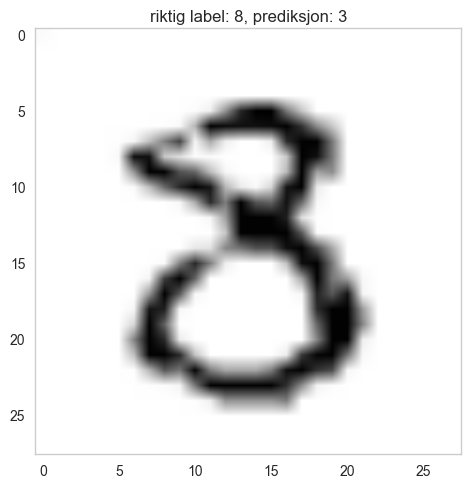

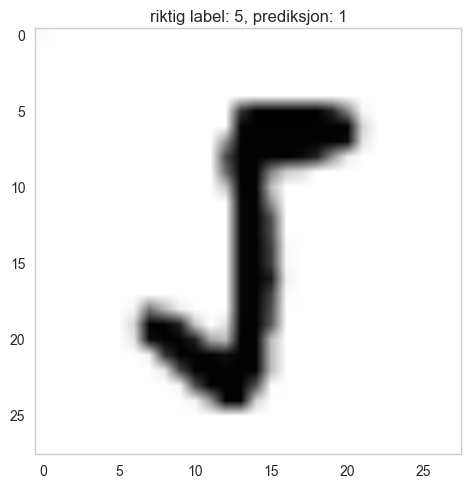

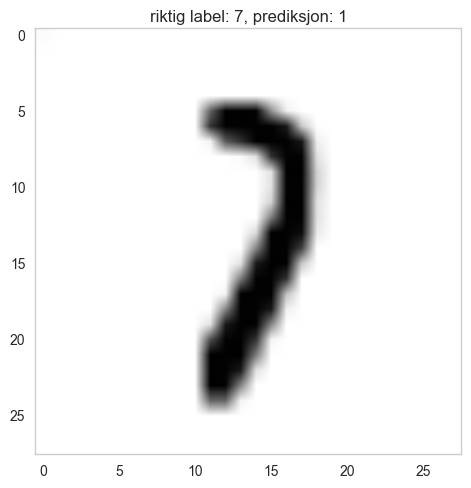

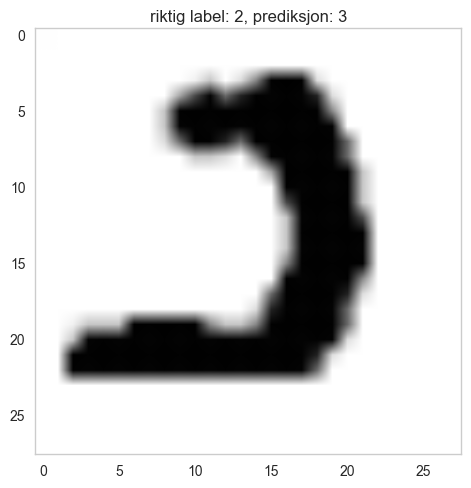

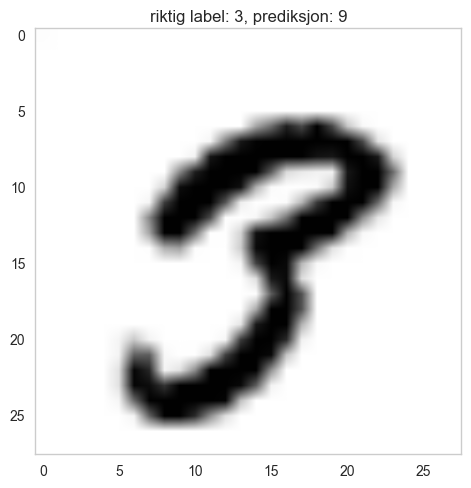

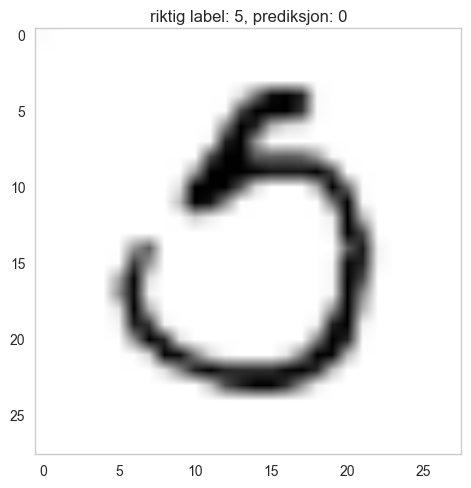

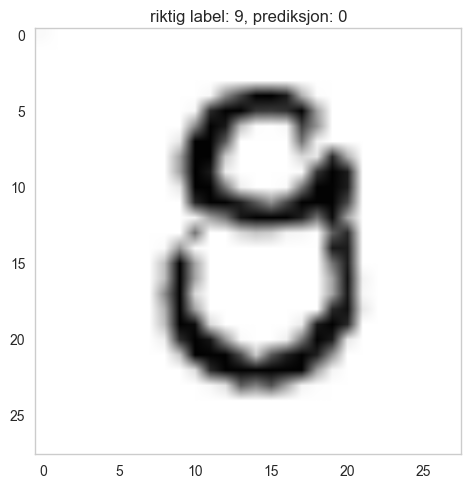

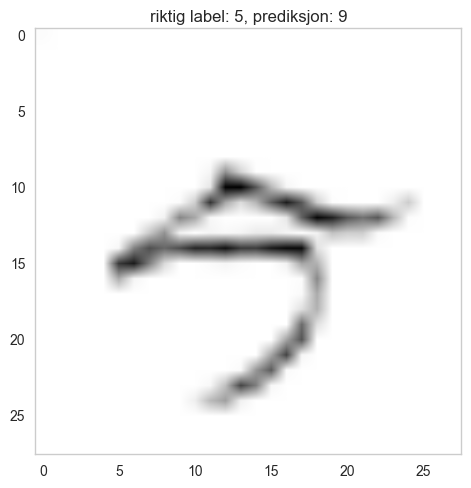

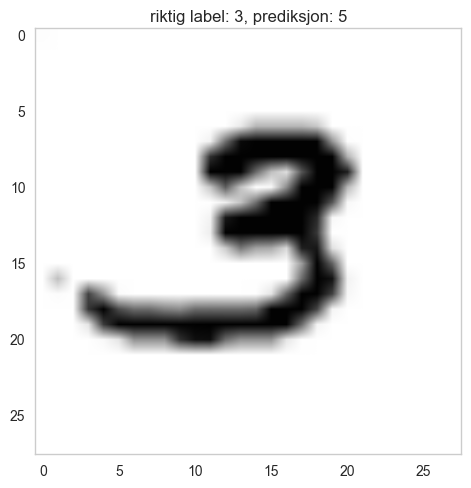

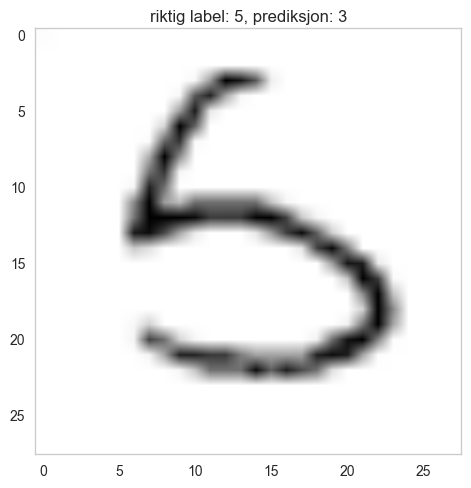

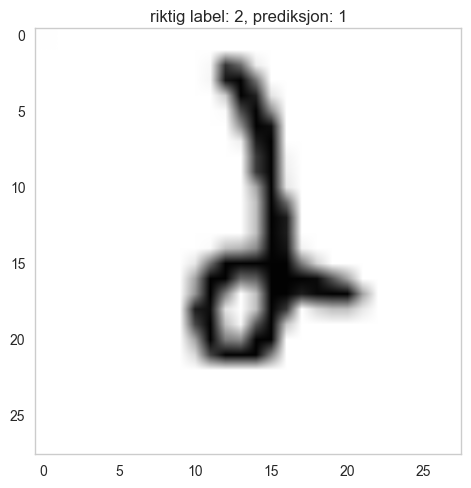

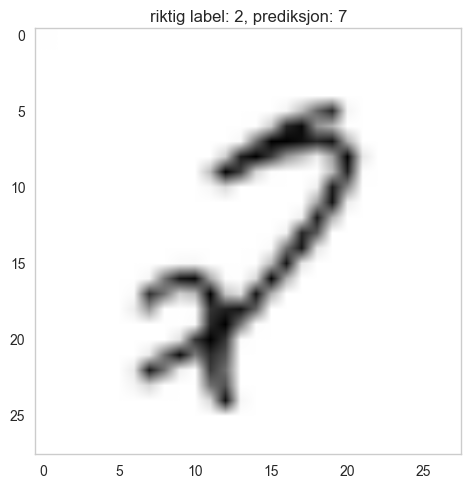

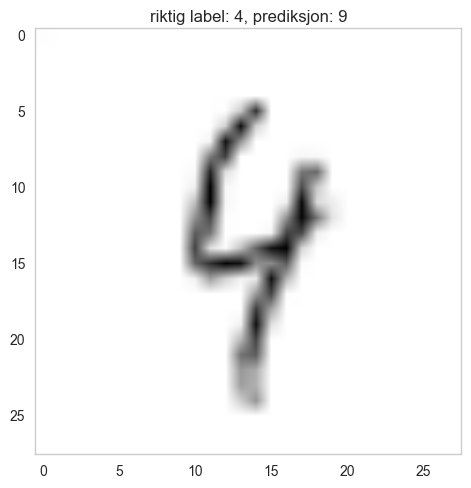

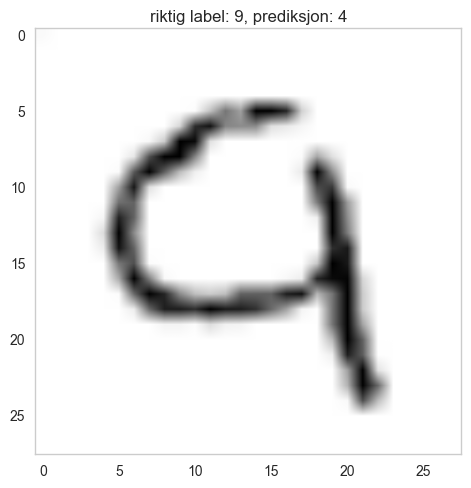

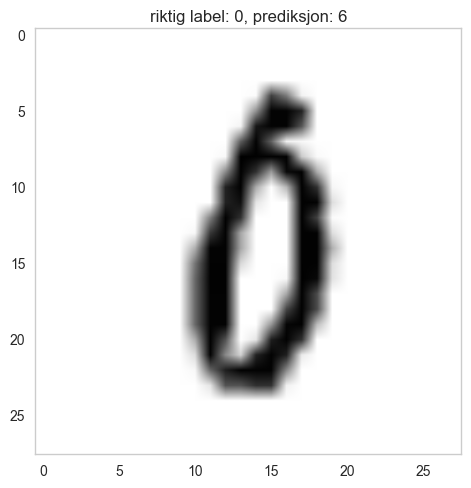

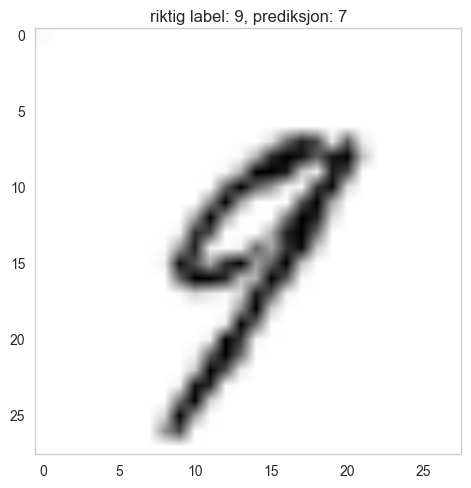

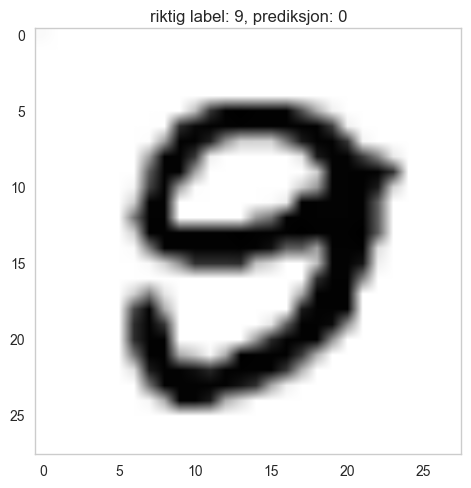

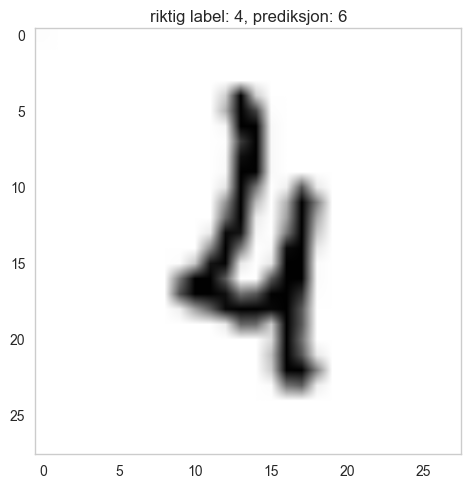

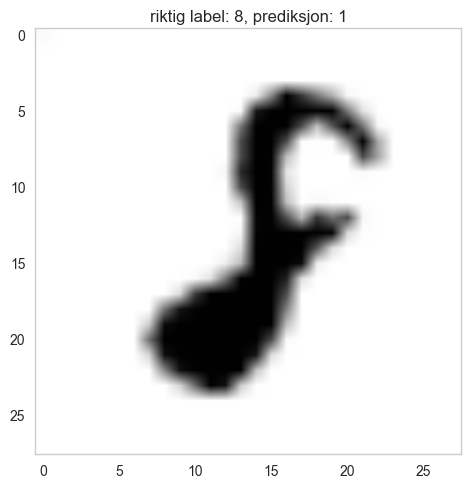

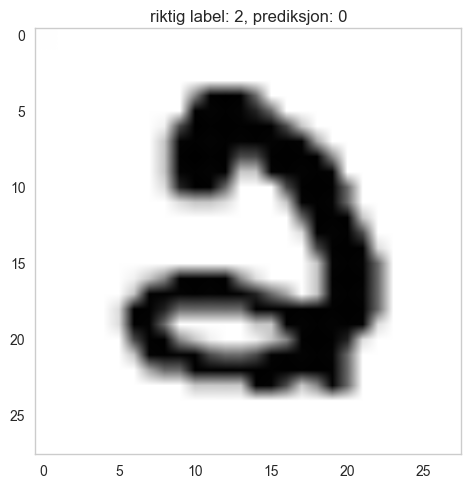

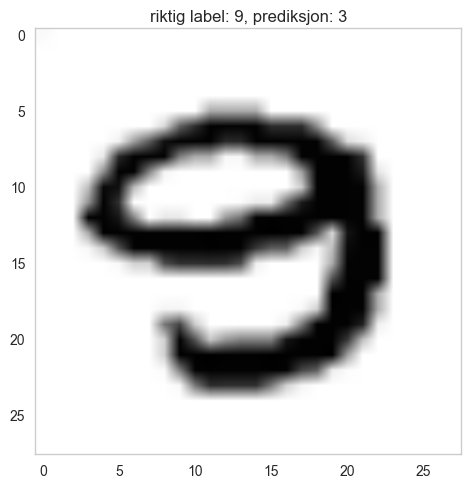

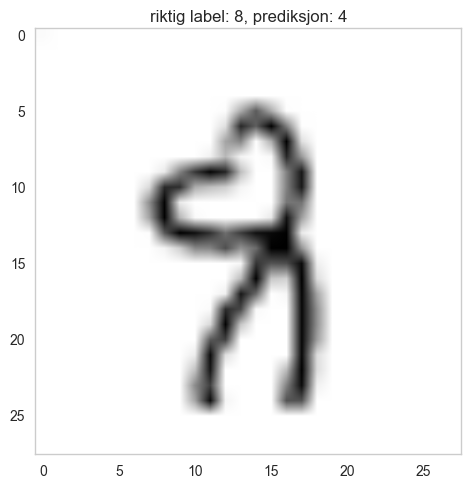

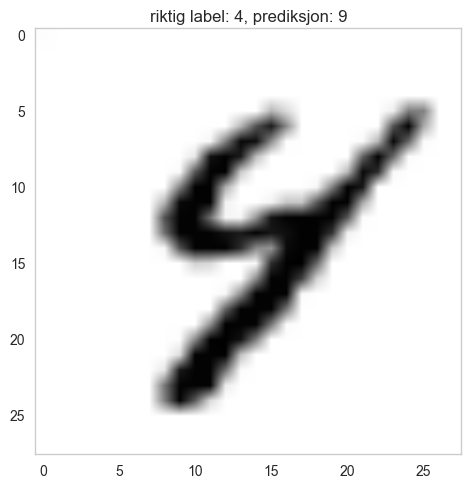

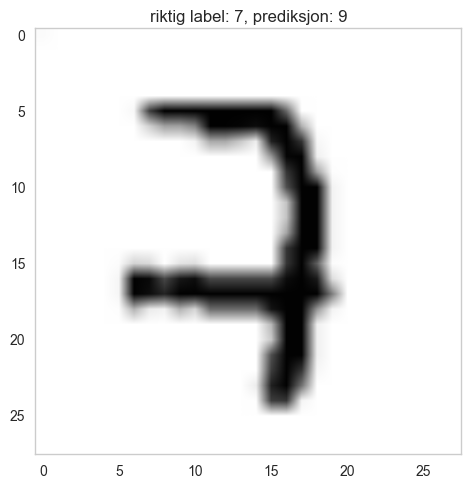

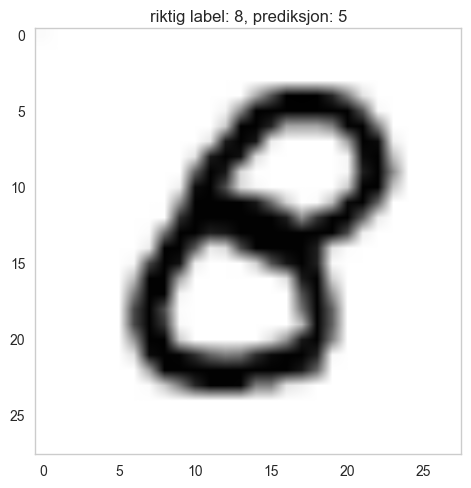

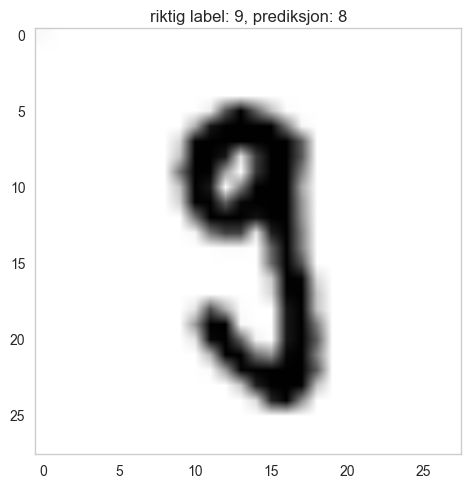

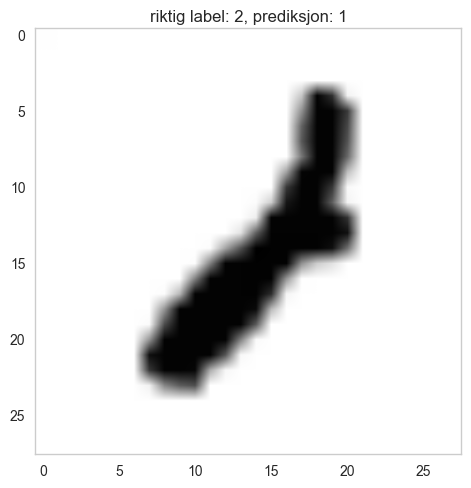

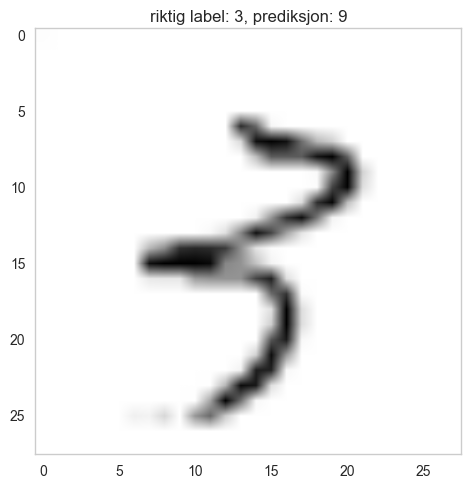

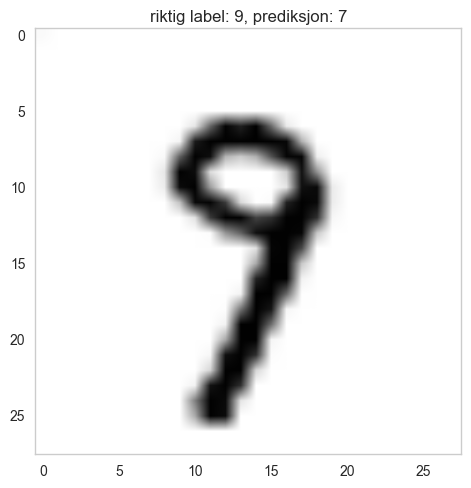

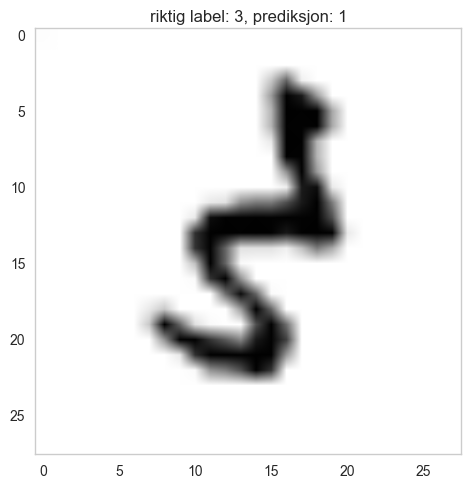

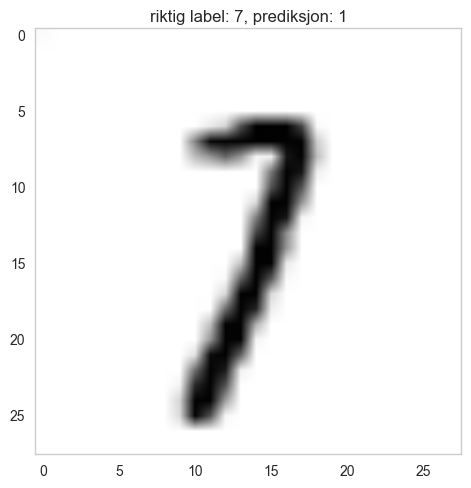

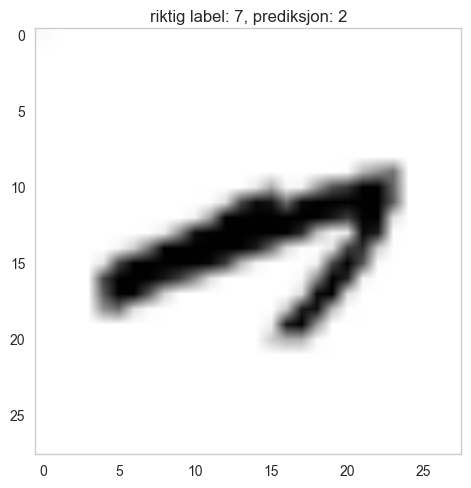

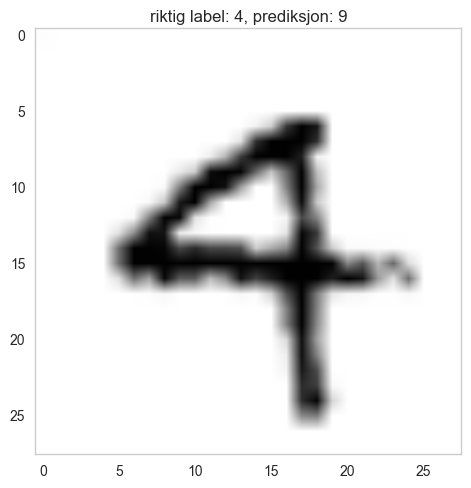

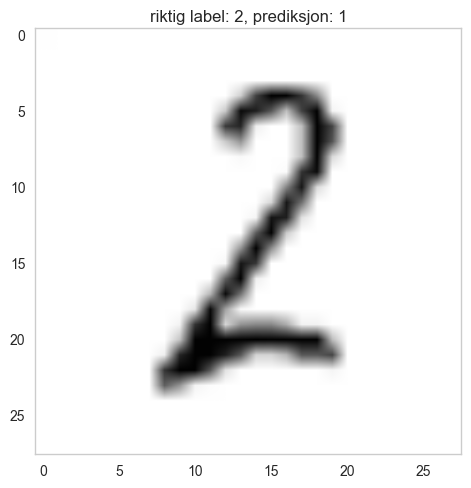

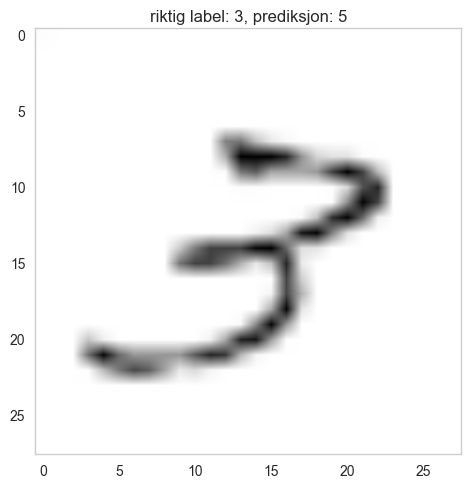

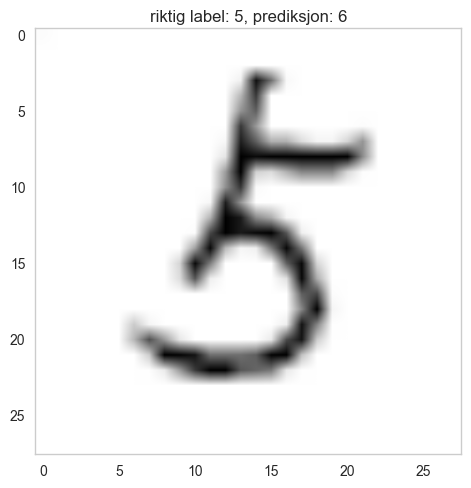

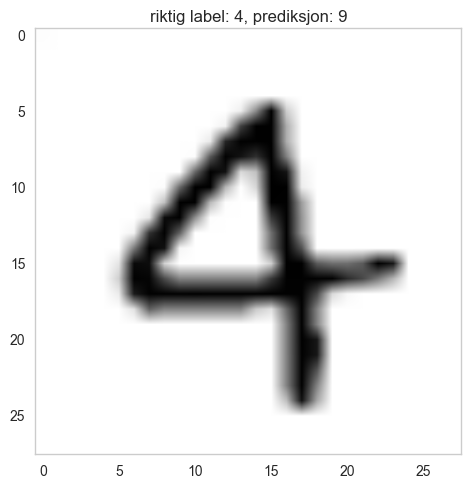

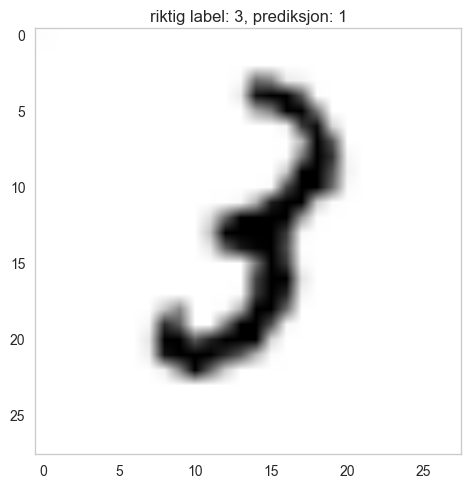

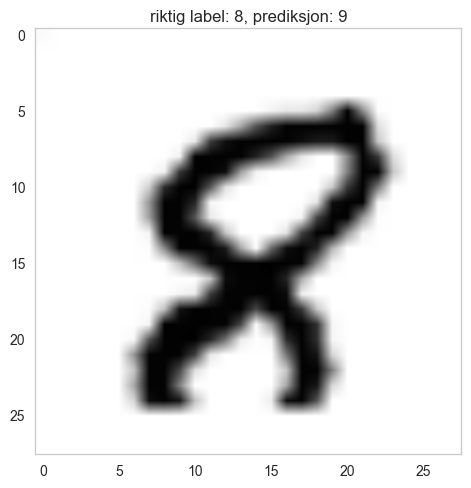

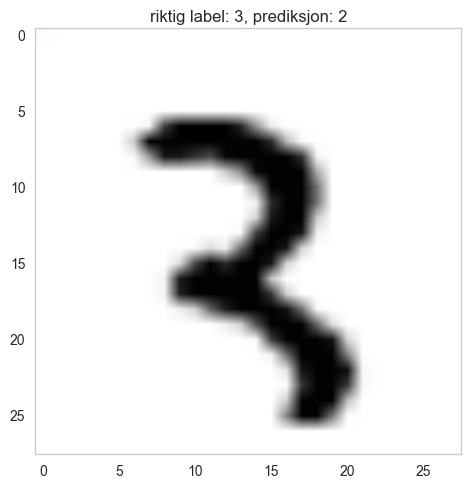

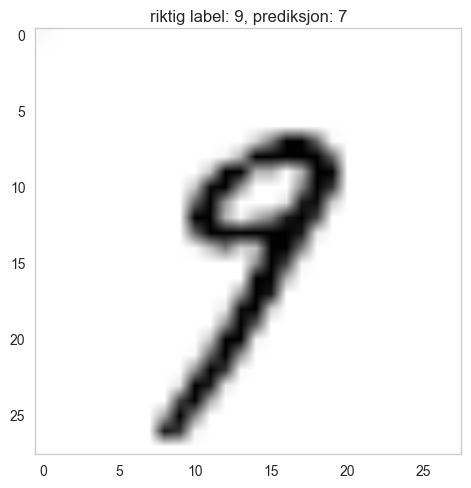

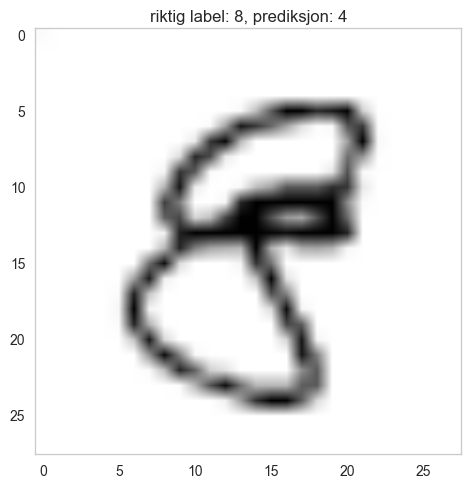

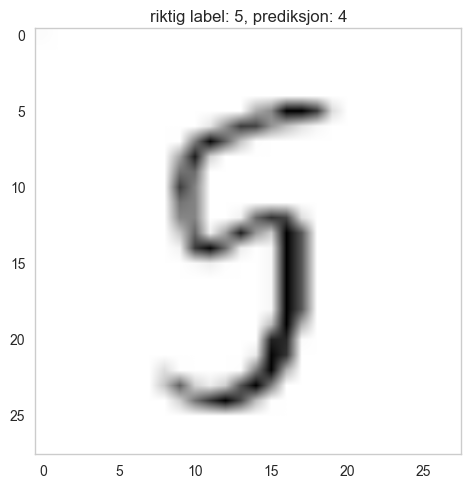

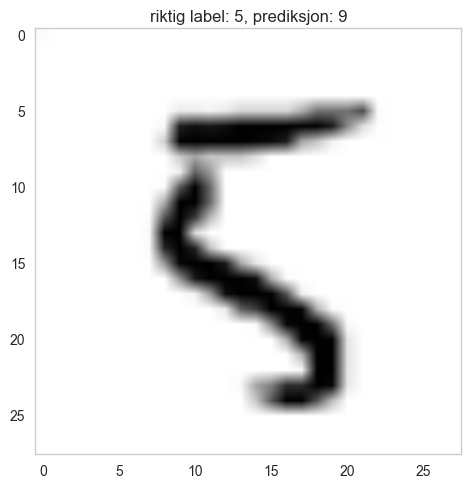

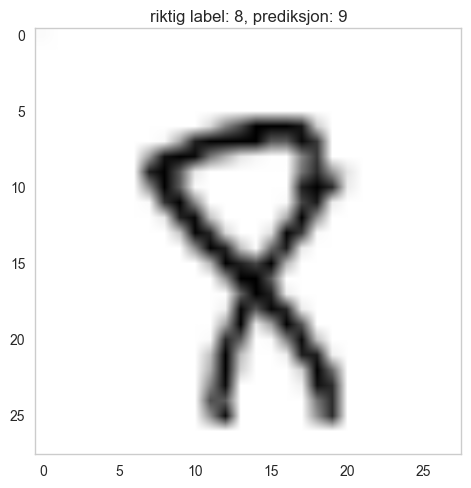

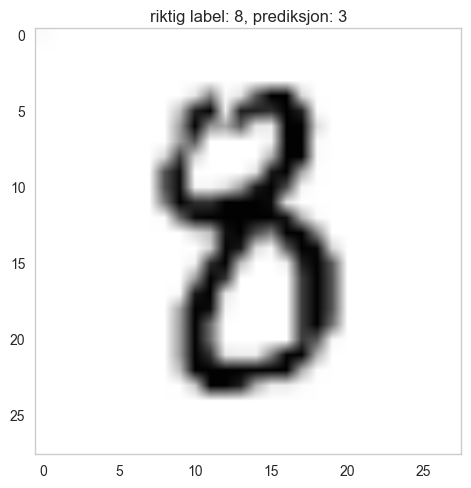

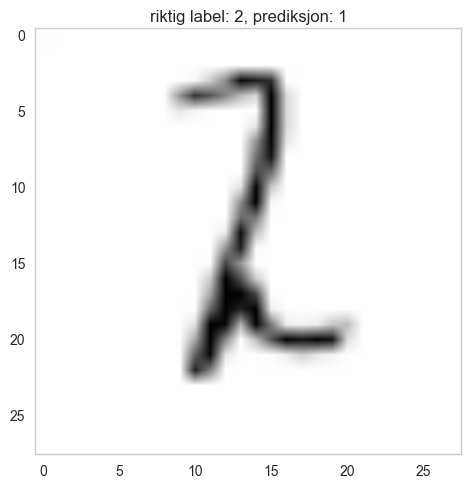

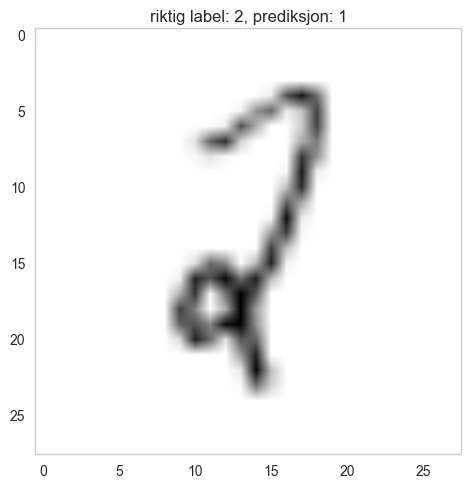

In [8]:
feil_klasse = predictions!=test_target.ravel()
feil_bilder = test_data[feil_klasse]

print feil_bilder.shape

for i,td in enumerate(feil_bilder):
    bilde = np.reshape(td,(28,28))
    plt.imshow(bilde)
    plt.title("riktig label: %d, prediksjon: %d" %(test_target[feil_klasse][i],predictions[feil_klasse][i]))
    
    plt.show()